In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Serif"
import os
from multiprocessing import Pool
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', dpi=200)
import glob
import pandas as pd
import seaborn as sns
import sys
from scipy.cluster.hierarchy import fcluster

from tslearn.clustering import TimeSeriesKMeans

/Users/shivyucel/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


# Outbreak Outlier Analysis

In [2]:
data_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/'

In [3]:
file_list = len(glob.glob('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/DPED/new_real_reduction/*'))

In [142]:

import sys
data_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/'

#populations = np.loadtxt(data_path + 'SIR/v1_populations.txt')
#
#populations = pd.Series(populations)
#
#
#top_1000 = populations.sort_values(ascending=False).index
#
#
#top_1000_files = [data_path + f'SIR/time_saved/DPED/new_real_reduction/all/{x}.csv' for x in top_1000]
file_list = glob.glob('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/DPED/new_real_reduction1/*')


new_dic = {}
for file in file_list:
    i+=1
    ts = pd.read_csv(file, index_col = 'Unnamed: 0')
    ts = ts.clip(lower=0)
    new_dic[file] = ts
    print(i)
    

counter = {}
time_dic = {}
count = 0 
print('done')


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

In [35]:
lst = [x.split('/')[-1] for x in file_list]

In [36]:
d =glob.glob('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/*')

In [37]:
dd = [x.split('/')[-1] for x in d]

In [38]:
[x for x in lst if x not in dd]

[]

In [34]:
all_locations = pd.Series(new_dic[file_list[0]].columns).append(pd.Series(new_dic[file_list[1]].columns))


def get_all_time_saved(location):
    loc_df = pd.DataFrame()
    print('started')
    for key in list(new_dic.keys()):
        if key.split('/')[-1][:-4] != location:
            #try:
            to_concat = pd.DataFrame(new_dic[key][location])
            to_concat.columns =  [key.split('/')[-1][:-4]]
            loc_df = pd.concat([loc_df, to_concat], axis=1)
            #except:
             #   continue
    loc_df.to_csv(data_path + f'SIR/time_saved/new_outlier_outbreaks/{location}.csv')
    print('done')


for fuke

#if __name__ == '__main__':
#    with Pool(8) as p:
#        print(p.map(get_all_time_saved, all_locations.values))

started
done


## Run  get_all.py to get data ready for outbreak outlier analysis

In [94]:
data_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/'
ids = pd.read_csv(data_path + 'h3/commuting/h3_ids.csv')
ids.rename(columns={'Unnamed: 0': 'hex_id'}, inplace=True)

zones = np.loadtxt(data_path + 'h3/commuting/lst_of_zones.csv', delimiter=',')
ids = ids[ids['0'].isin(zones)]
    
commute_outflow = pd.read_csv(data_path + f'h3/commuting/commuting_sums.csv')
commute_outflow = commute_outflow.merge(ids, left_on='SOURCE', right_on='0')

commute_inflow = pd.read_csv(data_path + f'h3/commuting/commuting_inflow.csv')
commute_inflow = commute_inflow.merge(ids, left_on='TARGET', right_on='0')

in_degree = pd.read_csv('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/commuting/clean_h3_commute_Tij_radiation.csv')
in_degree.drop_duplicates(['SOURCE', 'TARGET'], inplace=True)
in_degree = pd.DataFrame(in_degree.groupby('TARGET').count()).reset_index()
in_degree = in_degree.merge(ids, left_on='TARGET', right_on='0')[['0', 'SOURCE', 'hex_id']]

out_degree = pd.read_csv('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/commuting/clean_h3_commute_Tij_radiation.csv')
out_degree.drop_duplicates(['SOURCE', 'TARGET'], inplace=True)
out_degree = pd.DataFrame(out_degree.groupby('SOURCE').count()).reset_index()
out_degree = out_degree.merge(ids, left_on='SOURCE', right_on='0')[['0', 'TARGET', 'hex_id']]



In [95]:
pop = pd.read_csv(data_path + 'h3/population/h3_pop.csv')



In [97]:
lt = hex_ids[hex_ids['0'].isin(zones)]

In [96]:
demographics = pd.read_csv(data_path + 'h3/demographics/h3_demographic.csv')



In [136]:
dic = {}
demographics = pd.read_csv(data_path + 'h3/demographics/h3_demographic.csv')
income = pd.read_csv(data_path + 'h3/demographics/h3_income.csv')
pop = pd.read_csv(data_path + 'h3/population/h3_pop.csv')
zones = np.loadtxt(data_path + 'h3/commuting/lst_of_zones.csv', delimiter=',')
hex_ids = pd.read_csv(data_path + 'h3/commuting/h3_IDs.csv')
count = 0 

for file in glob.glob(data_path + f'h3/SIR/time_saved/new_outlier_outbreaks/*'):
    key = file.split('/')[-1][:-4]
    df = pd.read_csv(file)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    df.columns = df.columns.astype(int)
    df = df.reindex(sorted(df.columns), axis=1)
    
    columns_over = [col for col in df.columns if df[col].loc[0] >=  df.loc[0].median() + 1 * df.loc[0].std()]
    columns_under = [col for col in df.columns if df[col].loc[0] <=  df.loc[0].median() - 1 * df.loc[0].std()]
    
    over_series = pd.Series(columns_over).astype(int).values
    over_series = zones[over_series]
    under_series = pd.Series(columns_under).astype(int).values
    under_series = zones[under_series]

    
    over_IDs = hex_ids[hex_ids['0'].isin(over_series)]['Unnamed: 0'].values
    under_IDs = hex_ids[hex_ids['0'].isin(under_series)]['Unnamed: 0'].values
    

    water_over = demographics[demographics['h3'].isin(over_IDs)]['weighted_propor_water_network'].median()
    water_under = demographics[demographics['h3'].isin(under_IDs)]['weighted_propor_water_network'].median()


    black_over = demographics[demographics['h3'].isin(over_IDs)]['weighted_propor_black'].median()
    black_under = demographics[demographics['h3'].isin(under_IDs)]['weighted_propor_black'].median()

    
    white_over = demographics[demographics['h3'].isin(over_IDs)]['weighted_propor_white'].median()
    white_under = demographics[demographics['h3'].isin(under_IDs)]['weighted_propor_white'].median()
    
   
    
    brown_over = demographics[demographics['h3'].isin(over_IDs)]['weighted_propor_brown'].median()
    brown_under = demographics[demographics['h3'].isin(under_IDs)]['weighted_propor_brown'].median()
    
    
    pop_over = pop[pop['h3'].isin(over_IDs)]['2020_pop_h3'].median()
    pop_under = pop[pop['h3'].isin(under_IDs)]['2020_pop_h3'].median()
    
    
    income_over = income[income['h3'].isin(over_IDs)]['weighted_income_avg_head'].median()
    income_under = income[income['h3'].isin(under_IDs)]['weighted_income_avg_head'].median()
    
    in_degree_over = in_degree[in_degree['hex_id'].isin(over_IDs)]['SOURCE'].median()
    in_degree_under = in_degree[in_degree['hex_id'].isin(under_IDs)]['SOURCE'].median()
    
    out_degree_over = out_degree[out_degree['hex_id'].isin(over_IDs)]['TARGET'].median()
    out_degree_under = out_degree[out_degree['hex_id'].isin(under_IDs)]['TARGET'].median() 
    
    commute_out_over = commute_outflow[commute_outflow['hex_id'].isin(over_IDs)]['FLUX'].median()
    commute_out_under = commute_outflow[commute_outflow['hex_id'].isin(under_IDs)]['FLUX'].median()

    commute_in_over = commute_inflow[commute_inflow['hex_id'].isin(over_IDs)]['FLUX'].median()
    commute_in_under = commute_inflow[commute_inflow['hex_id'].isin(under_IDs)]['FLUX'].median()

    dic[key] = {}
    dic[key]['over_series'] = over_series
    dic[key]['under_series'] = under_series
    
    dic[key]['water_under'] = water_under
    dic[key]['water_over'] = water_over 
    
    dic[key]['black_under'] = black_under
    dic[key]['black_over'] = black_over
    dic[key]['white_over'] = white_over
    dic[key]['white_under'] = white_under
    dic[key]['brown_over'] = brown_over
    dic[key]['brown_under'] = brown_under
    
    
    dic[key]['pop_over'] = pop_over
    dic[key]['pop_under'] = pop_under
    dic[key]['income_over'] = income_over
    dic[key]['income_under'] = income_under
    dic[key]['in_degree_over'] = in_degree_over
    dic[key]['in_degree_und'] = in_degree_under
    
    dic[key]['out_degree_over'] = out_degree_over
    dic[key]['out_degree_und'] = out_degree_under
    
    dic[key]['w_indegree_over'] = commute_in_over
    dic[key]['w_indegree_under'] = commute_in_under
    dic[key]['w_outdegree_over'] = commute_out_over
    dic[key]['w_outdegree_under'] = commute_out_under
    print(count)
    count += 1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [166]:
newdf = pd.DataFrame(df.iloc[2:].median(axis=1)).reset_index()

In [168]:
newdf

index             0
0         water_under      0.962370
1          water_over      0.983054
2         black_under      0.061539
3          black_over      0.039477
4          white_over      0.706648
5         white_under      0.511661
6          brown_over      0.195787
7         brown_under      0.372527
8            pop_over   3680.563072
9           pop_under   3190.750315
10        income_over   2209.967622
11       income_under   1157.070177
12     in_degree_over    611.000000
13      in_degree_und    583.500000
14    out_degree_over    603.500000
15     out_degree_und    584.000000
16    w_indegree_over  13740.354224
17   w_indegree_under  10475.376007
18   w_outdegree_over   4842.672470
19  w_outdegree_under   2042.057676

In [167]:
 newdf['perc'] = [41, 52, 58, 17, 73, 33, 24, 63, 48, 44, 77, 35, 56, 51, 5549, 42, 58, 40]

ValueError: Length of values (18) does not match length of index (20)

In [177]:
newdf['Outbreak Outliers'] = ["Positive Outlier" if x.split('_')[-1]=='over' else "Negative Outlier"  for x in nee['index']]

In [173]:
newdf['perc'] = [41, 52, 58, 17, 73, 33, 24, 63, 48, 44, 77, 35, 56, 51,54, 51, 49, 42, 58, 40]

In [174]:
newdf['label'] = ['Water Propor.', 'Water Propor.', 'Black Propor.', 'Black Propor.', 'White Propor.', 'White Propor.', 'Brown Propor.', \
                  'Brown Propor.', 'Population', 'Population', 'Income', 'Income', 'In-Degree Centrality', 'In-Degree Centrality', 'Out-Degree Centrality', 'Out-Degree Centrality','Commuters In'\
                 , 'Commuters In', 'Commuters Out', 'Commuters Out']

In [185]:
stats.percentileofscore(out_degree['TARGET'], 603)

54.95067592254293

In [179]:
newdf = newdf.iloc[[12, 13, 14, 15, 16, 17, 18, 19, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7]]

In [165]:
 newdf['perc'] = [41, 52, 58, 17, 73, 33, 24, 63, 48, 44, 77, 35, 56, 51, 49, 42, 58, 40]

index             0 Outbreak Outliers                  label
12     in_degree_over    611.000000  Negative Outlier   In-Degree Centrality
13      in_degree_und    583.500000  Positive Outlier   In-Degree Centrality
14    out_degree_over    603.500000  Negative Outlier  Out-Degree Centrality
15     out_degree_und    584.000000  Positive Outlier  Out-Degree Centrality
16    w_indegree_over  13740.354224  Positive Outlier           Commuters In
17   w_indegree_under  10475.376007  Negative Outlier           Commuters In
18   w_outdegree_over   4842.672470  Positive Outlier          Commuters Out
19  w_outdegree_under   2042.057676  Negative Outlier          Commuters Out
8            pop_over   3680.563072  Positive Outlier             Population
9           pop_under   3190.750315  Negative Outlier             Population
10        income_over   2209.967622  Positive Outlier                 Income
11       income_under   1157.070177  Negative Outlier                 Income
0         water_under      0.962370  Positive Outlier          Water Propor.
1          water_over      0.983054  Negative Outlier          Water Propor.
2         black_under      0.061539  Positive Outlier          Black Propor.
3          black_over      0.039477  Negative Outlier          Black Propor.
4          white_over      0.706648  Positive Outlier          White Propor.
5         white_under      0.511661  Negative Outlier          White Propor.
6          brown_over      0.195787  Positive Outlier          Brown Propor.
7         brown_under      0.372527  Negative Outlier          Brown Propor.

In [180]:
newdf

index             0  perc                  label  \
12     in_degree_over    611.000000    56   In-Degree Centrality   
13      in_degree_und    583.500000    51   In-Degree Centrality   
14    out_degree_over    603.500000    54  Out-Degree Centrality   
15     out_degree_und    584.000000    51  Out-Degree Centrality   
16    w_indegree_over  13740.354224    49           Commuters In   
17   w_indegree_under  10475.376007    42           Commuters In   
18   w_outdegree_over   4842.672470    58          Commuters Out   
19  w_outdegree_under   2042.057676    40          Commuters Out   
8            pop_over   3680.563072    48             Population   
9           pop_under   3190.750315    44             Population   
10        income_over   2209.967622    77                 Income   
11       income_under   1157.070177    35                 Income   
0         water_under      0.962370    41          Water Propor.   
1          water_over      0.983054    52          Water Propor.   
2         black_under      0.061539    58          Black Propor.   
3          black_over      0.039477    17          Black Propor.   
4          white_over      0.706648    73          White Propor.   
5         white_under      0.511661    33          White Propor.   
6          brown_over      0.195787    24          Brown Propor.   
7         brown_under      0.372527    63          Brown Propor.   

   Outbreak Outliers  
12  Negative Outlier  
13  Positive Outlier  
14  Negative Outlier  
15  Positive Outlier  
16  Positive Outlier  
17  Negative Outlier  
18  Positive Outlier  
19  Negative Outlier  
8   Positive Outlier  
9   Negative Outlier  
10  Positive Outlier  
11  Negative Outlier  
0   Positive Outlier  
1   Negative Outlier  
2   Positive Outlier  
3   Negative Outlier  
4   Positive Outlier  
5   Negative Outlier  
6   Positive Outlier  
7   Negative Outlier

In [89]:
newdf['label'].sort_values(['In-Degree Centrality'])

TypeError: unhashable type: 'list'

In [79]:
newdf.append(newdf.iloc[:2])

index             0               col Outbreak Outliers  \
0         water_under      0.962370  Negative Outlier  Negative Outlier   
1          water_over      0.983054  Positive Outlier  Positive Outlier   
2         black_under      0.061539  Negative Outlier  Negative Outlier   
3          black_over      0.039477  Positive Outlier  Positive Outlier   
4          white_over      0.706648  Positive Outlier  Positive Outlier   
5         white_under      0.511661  Negative Outlier  Negative Outlier   
6          brown_over      0.195787  Positive Outlier  Positive Outlier   
7         brown_under      0.372527  Negative Outlier  Negative Outlier   
8            pop_over   3680.563072  Positive Outlier  Positive Outlier   
9           pop_under   3190.750315  Negative Outlier  Negative Outlier   
10        income_over   2209.967622  Positive Outlier  Positive Outlier   
11       income_under   1157.070177  Negative Outlier  Negative Outlier   
12     in_degree_over    611.000000  Positive Outlier  Positive Outlier   
13      in_degree_und    583.500000  Negative Outlier  Negative Outlier   
14    w_indegree_over  13740.354224  Positive Outlier  Positive Outlier   
15   w_indegree_under  10475.376007  Negative Outlier  Negative Outlier   
16   w_outdegree_over   4842.672470  Positive Outlier  Positive Outlier   
17  w_outdegree_under   2042.057676  Negative Outlier  Negative Outlier   
0         water_under      0.962370  Negative Outlier  Negative Outlier   
1          water_over      0.983054  Positive Outlier  Positive Outlier   

                   label  perc  
0          Water Propor.    41  
1          Water Propor.    52  
2          Black Propor.    58  
3          Black Propor.    17  
4          White Propor.    73  
5          White Propor.    33  
6          Brown Propor.    24  
7          Brown Propor.    63  
8             Population    48  
9             Population    44  
10                Income    77  
11                Income    35  
12  In-Degree Centrality    56  
13  In-Degree Centrality    51  
14          Commuters In    49  
15          Commuters In    42  
16         Commuters Out    58  
17         Commuters Out    40  
0          Water Propor.    41  
1          Water Propor.    52

In [154]:
nee

index             0                  label Outbreak Outliers
12     in_degree_over    611.000000   In-Degree Centrality  Positive Outlier
13      in_degree_und    583.500000   In-Degree Centrality  Negative Outlier
14    out_degree_over    603.500000  Out-Degree Centrality  Positive Outlier
15     out_degree_und    584.000000  Out-Degree Centrality  Negative Outlier
16    w_indegree_over  13740.354224           Commuters In  Positive Outlier
17   w_indegree_under  10475.376007           Commuters In  Negative Outlier
18   w_outdegree_over   4842.672470          Commuters Out  Positive Outlier
19  w_outdegree_under   2042.057676          Commuters Out  Negative Outlier
8            pop_over   3680.563072             Population  Positive Outlier
9           pop_under   3190.750315             Population  Negative Outlier
10        income_over   2209.967622                 Income  Positive Outlier
11       income_under   1157.070177                 Income  Negative Outlier
0         water_under      0.962370          Water Propor.  Negative Outlier
1          water_over      0.983054          Water Propor.  Positive Outlier
2         black_under      0.061539          Black Propor.  Negative Outlier
3          black_over      0.039477          Black Propor.  Positive Outlier
4          white_over      0.706648          White Propor.  Positive Outlier
5         white_under      0.511661          White Propor.  Negative Outlier
6          brown_over      0.195787          Brown Propor.  Positive Outlier
7         brown_under      0.372527          Brown Propor.  Negative Outlier

In [63]:
newdf['perc'] = [41, 52, 58, 17, 73, 33, 24, 63, 48, 44, 77, 35, 56, 51, 49, 42, 58, 40]

In [181]:
newdf

index             0  perc                  label  \
12     in_degree_over    611.000000    56   In-Degree Centrality   
13      in_degree_und    583.500000    51   In-Degree Centrality   
14    out_degree_over    603.500000    54  Out-Degree Centrality   
15     out_degree_und    584.000000    51  Out-Degree Centrality   
16    w_indegree_over  13740.354224    49           Commuters In   
17   w_indegree_under  10475.376007    42           Commuters In   
18   w_outdegree_over   4842.672470    58          Commuters Out   
19  w_outdegree_under   2042.057676    40          Commuters Out   
8            pop_over   3680.563072    48             Population   
9           pop_under   3190.750315    44             Population   
10        income_over   2209.967622    77                 Income   
11       income_under   1157.070177    35                 Income   
0         water_under      0.962370    41          Water Propor.   
1          water_over      0.983054    52          Water Propor.   
2         black_under      0.061539    58          Black Propor.   
3          black_over      0.039477    17          Black Propor.   
4          white_over      0.706648    73          White Propor.   
5         white_under      0.511661    33          White Propor.   
6          brown_over      0.195787    24          Brown Propor.   
7         brown_under      0.372527    63          Brown Propor.   

   Outbreak Outliers  
12  Negative Outlier  
13  Positive Outlier  
14  Negative Outlier  
15  Positive Outlier  
16  Positive Outlier  
17  Negative Outlier  
18  Positive Outlier  
19  Negative Outlier  
8   Positive Outlier  
9   Negative Outlier  
10  Positive Outlier  
11  Negative Outlier  
0   Positive Outlier  
1   Negative Outlier  
2   Positive Outlier  
3   Negative Outlier  
4   Positive Outlier  
5   Negative Outlier  
6   Positive Outlier  
7   Negative Outlier

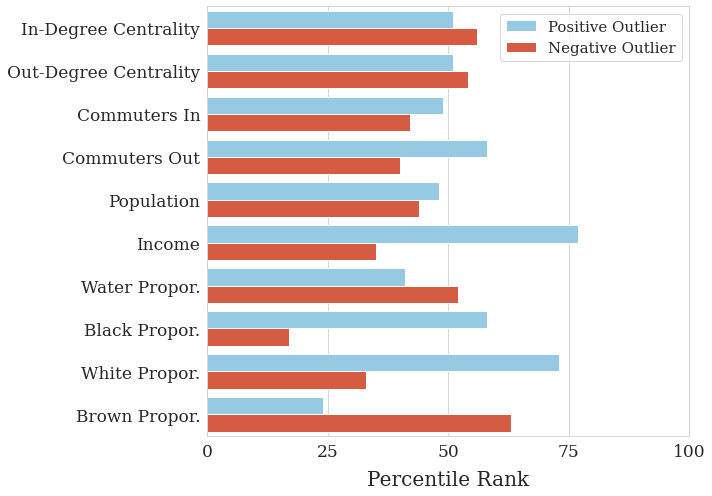

In [184]:
fig, ax = plt.subplots(figsize=(10,  7))
sns.barplot(data=newdf, x='perc', y='label', hue='Outbreak Outliers', ax= ax, 
            hue_order=['Positive Outlier', 'Negative Outlier'], palette=["#89CFF0", "#EE4B2B"])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), title='Line', loc='upper left')
plt.xticks(ticks= np.arange(0, 110, 25))
ax.legend( title_fontsize=0, fontsize=15)
plt.xlabel("Percentile Rank", fontsize=20, labelpad=10)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.ylabel("")
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/outlierbar1.pdf', dpi=300)

plt.show()

In [398]:
print(pop['2020_pop_h3'].describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &  2020\_pop\_h3 \\
\midrule
count &  2892.000000 \\
mean  &  4333.899654 \\
std   &  3331.863013 \\
min   &    18.260901 \\
25\%   &  1472.770504 \\
50\%   &  3922.952873 \\
75\%   &  6637.255246 \\
max   & 21351.284211 \\
\bottomrule
\end{tabular}



In [129]:
print(commute_outflow['FLUX'].describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &          FLUX \\
\midrule
count &  2.737000e+03 \\
mean  &  2.338511e+04 \\
std   &  1.017522e+05 \\
min   &  1.801198e+01 \\
25\%   &  6.850367e+02 \\
50\%   &  3.416137e+03 \\
75\%   &  1.062741e+04 \\
max   &  2.506462e+06 \\
\bottomrule
\end{tabular}



In [71]:
in_degree['SOURCE']

0       1122
1        458
2        817
3        716
4       1085
        ... 
2732     243
2733    1612
2734     238
2735     510
2736     820
Name: SOURCE, Length: 2737, dtype: int64

In [136]:
in_degree

0  SOURCE           hex_id
0        0     632  88a8103a51fffff
1        1     338  88a8102955fffff
2        2     635  88a81045abfffff
3        3     565  88a8100327fffff
4        4     531  88a81000edfffff
...    ...     ...              ...
2732  2845     185  88a8106327fffff
2733  2847     906  88a8107aabfffff
2734  2849     229  88a810a893fffff
2735  2853     393  88a8100b41fffff
2736  2863     593  88a8102355fffff

[2737 rows x 3 columns]

In [ ]:
pop[pop['h3'].isin(lt['Unnamed: 0'])].describe()

In [141]:
demographics

h3  weighted_propor_private  weighted_propor_per_household  \
0     88a8100001fffff                 0.985254                       0.034652   
1     88a8100003fffff                 0.989462                       0.050747   
2     88a8100005fffff                 1.000000                       0.004892   
3     88a8100007fffff                 0.999606                       0.008343   
4     88a8100009fffff                 1.000000                       0.006716   
...               ...                      ...                            ...   
2888  88a812b4d7fffff                 0.997402                       0.007139   
2889  88a812b4d9fffff                 1.000000                       0.015596   
2890  88a812b4ddfffff                 0.999772                       0.004283   
2891  88a812b6b5fffff                 1.000001                       0.004880   
2892  88a812b6e3fffff                 0.985397                       0.008896   

      weighted_propor_water_network  weighted_propor_sewage_network  \
0                          0.935489                        0.761054   
1                          0.870117                        0.721796   
2                          0.998988                        0.742636   
3                          0.981505                        0.855993   
4                          0.961753                        0.456119   
...                             ...                             ...   
2888                       0.831769                        0.768381   
2889                       0.585061                        0.535223   
2890                       0.975317                        0.958352   
2891                       0.665993                        0.532838   
2892                       0.020525                        0.000649   

      weighted_propor_septic_tank  weighted_propor_white  \
0                        0.067165               0.370777   
1                        0.006890               0.388030   
2                        0.120064               0.435077   
3                        0.038847               0.497669   
4                        0.513651               0.681444   
...                           ...                    ...   
2888                     0.162555               0.821516   
2889                     0.412172               0.772695   
2890                     0.033999               0.832261   
2891                     0.036894               0.702445   
2892                     0.288946               0.810139   

      weighted_propor_black  weighted_propor_yellow  weighted_propor_brown  \
0                  0.154401                0.006060               0.453469   
1                  0.086106                0.003689               0.393478   
2                  0.087611                0.004653               0.471979   
3                  0.074164                0.010431               0.401640   
4                  0.054245                0.005592               0.258680   
...                     ...                     ...                    ...   
2888               0.022575                0.007821               0.148085   
2889               0.013030                0.016439               0.197763   
2890               0.022572                0.009243               0.135924   
2891               0.025083                0.001602               0.270871   
2892               0.011390                0.000000               0.178471   

      weighted_propor_indigenous  
0                       0.000546  
1                       0.000479  
2                       0.000681  
3                       0.000553  
4                       0.000040  
...                          ...  
2888                    0.000004  
2889                    0.000072  
2890                    0.000000  
2891                    0.000000  
2892                    0.000000  

[2893 rows x 11 columns]

In [322]:
from matplotlib.pyplot import rcParams

In [328]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18,
                     'axes.labelsize': 18.0,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18})

In [76]:
in_degree

0  SOURCE           hex_id
0        0     632  88a8103a51fffff
1        1     338  88a8102955fffff
2        2     635  88a81045abfffff
3        3     565  88a8100327fffff
4        4     531  88a81000edfffff
...    ...     ...              ...
2732  2845     185  88a8106327fffff
2733  2847     906  88a8107aabfffff
2734  2849     229  88a810a893fffff
2735  2853     393  88a8100b41fffff
2736  2863     593  88a8102355fffff

[2737 rows x 3 columns]

In [78]:
import scipy.stats as stats

In [79]:
stats.percentileofscore(in_degree['SOURCE'], 673)

66.07599561563755

In [61]:
pd.DataFrame('In-Degree Centrality')

ValueError: DataFrame constructor not properly called!

In [35]:
df.iloc[2:].median(axis=1)

water_under              0.962370
water_over               0.983054
black_under              0.061539
black_over               0.039477
white_over               0.706648
white_under              0.511661
brown_over               0.195787
brown_under              0.372527
pop_over              3680.563072
pop_under             3190.750315
income_over           2209.967622
income_under          1157.070177
in_degree_over         611.000000
in_degree_und          583.500000
w_indegree_over      13740.354224
w_indegree_under     10475.376007
w_outdegree_over      4842.672470
w_outdegree_under     2042.057676
dtype: float64

In [378]:
pd.set_option('float_format', '{:f}'.format)

In [394]:
pops['2020_pop_h3']

0      4835.972552
1      4836.181592
2      4952.167404
3      5543.255409
4      4835.525162
           ...    
2887    445.629580
2888    209.993790
2889    507.106201
2890    507.038320
2891     18.260901
Name: 2020_pop_h3, Length: 2892, dtype: float64

In [413]:
income

h3  weighted_income_avg_head  weighted_income_total  \
0     88a8100001fffff               1143.143445          219045.011075   
1     88a8100003fffff                928.374062          266227.034608   
2     88a8100005fffff               1004.591452          387886.510746   
3     88a8100007fffff               1160.208616          423527.487669   
4     88a8100009fffff               2069.354689          702143.748680   
...               ...                       ...                    ...   
2888  88a812b4d7fffff               1115.374845          446098.731205   
2889  88a812b4d9fffff               1486.043800          210526.126063   
2890  88a812b4ddfffff               1513.275799          539765.072796   
2891  88a812b6b5fffff                998.907446          318560.754692   
2892  88a812b6e3fffff               1216.347401          180273.341049   

      weighted_income_0  weighted_income_1  weighted_income_2  
0              7.212334          51.759904         148.251059  
1              5.355643          76.529913         189.355202  
2             11.044067          94.836875         326.202259  
3              8.900752          90.437966         249.151094  
4              3.386166          68.824963         193.317424  
...                 ...                ...                ...  
2888          13.022348         117.310452         317.582862  
2889           9.380995          45.194918          84.349785  
2890          12.047683          89.093817         274.790064  
2891          25.278079         104.955868         260.965943  
2892          15.289852          54.151630         129.386571  

[2893 rows x 6 columns]

In [414]:
income[income['h3'].isin(lt['Unnamed: 0'])].describe()

weighted_income_avg_head  weighted_income_total  weighted_income_0  \
count               2737.000000            2737.000000        2737.000000   
mean                2116.473023          691383.812728          10.442212   
std                 2250.194571          628209.606382          10.762189   
min                    0.000000             882.026335           0.000000   
25%                 1061.986823          373933.344503           3.432610   
50%                 1386.621964          527892.397295           7.048473   
75%                 2129.542484          770550.187691          13.783558   
max                28471.988050         7612612.000000         122.000000   

       weighted_income_1  weighted_income_2  
count        2737.000000        2737.000000  
mean           78.796379         249.150157  
std            42.252727         106.321424  
min             0.000000           0.404599  
25%            49.929401         178.256522  
50%            75.478646         235.441606  
75%           100.631486         304.022887  
max           324.289580        1001.239477

In [411]:
demographics

h3  weighted_propor_private  weighted_propor_per_household  \
0     88a8100001fffff                 0.985254                       0.034652   
1     88a8100003fffff                 0.989462                       0.050747   
2     88a8100005fffff                 1.000000                       0.004892   
3     88a8100007fffff                 0.999606                       0.008343   
4     88a8100009fffff                 1.000000                       0.006716   
...               ...                      ...                            ...   
2888  88a812b4d7fffff                 0.997402                       0.007139   
2889  88a812b4d9fffff                 1.000000                       0.015596   
2890  88a812b4ddfffff                 0.999772                       0.004283   
2891  88a812b6b5fffff                 1.000001                       0.004880   
2892  88a812b6e3fffff                 0.985397                       0.008896   

      weighted_propor_water_network  weighted_propor_sewage_network  \
0                          0.935489                        0.761054   
1                          0.870117                        0.721796   
2                          0.998988                        0.742636   
3                          0.981505                        0.855993   
4                          0.961753                        0.456119   
...                             ...                             ...   
2888                       0.831769                        0.768381   
2889                       0.585061                        0.535223   
2890                       0.975317                        0.958352   
2891                       0.665993                        0.532838   
2892                       0.020525                        0.000649   

      weighted_propor_septic_tank  weighted_propor_white  \
0                        0.067165               0.370777   
1                        0.006890               0.388030   
2                        0.120064               0.435077   
3                        0.038847               0.497669   
4                        0.513651               0.681444   
...                           ...                    ...   
2888                     0.162555               0.821516   
2889                     0.412172               0.772695   
2890                     0.033999               0.832261   
2891                     0.036894               0.702445   
2892                     0.288946               0.810139   

      weighted_propor_black  weighted_propor_yellow  weighted_propor_brown  \
0                  0.154401                0.006060               0.453469   
1                  0.086106                0.003689               0.393478   
2                  0.087611                0.004653               0.471979   
3                  0.074164                0.010431               0.401640   
4                  0.054245                0.005592               0.258680   
...                     ...                     ...                    ...   
2888               0.022575                0.007821               0.148085   
2889               0.013030                0.016439               0.197763   
2890               0.022572                0.009243               0.135924   
2891               0.025083                0.001602               0.270871   
2892               0.011390                0.000000               0.178471   

      weighted_propor_indigenous  
0                       0.000546  
1                       0.000479  
2                       0.000681  
3                       0.000553  
4                       0.000040  
...                          ...  
2888                    0.000004  
2889                    0.000072  
2890                    0.000000  
2891                    0.000000  
2892                    0.000000  

[2893 rows x 11 columns]

In [410]:
demographics['weighted_propor_water_network'].describe()

count   2893.000000
mean       0.882279
std        0.205350
min        0.000000
25%        0.877785
50%        0.977442
75%        0.995288
max        1.042995
Name: weighted_propor_water_network, dtype: float64

In [195]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.rcParams.update({'font.size': 20,
                     'axes.labelsize': 20.0,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20})

In [459]:
income['weighted_income_avg_head'].replace(0, 0.1, inplace=True)

In [196]:
plt.rcParams['legend.title_fontsize'] = 30

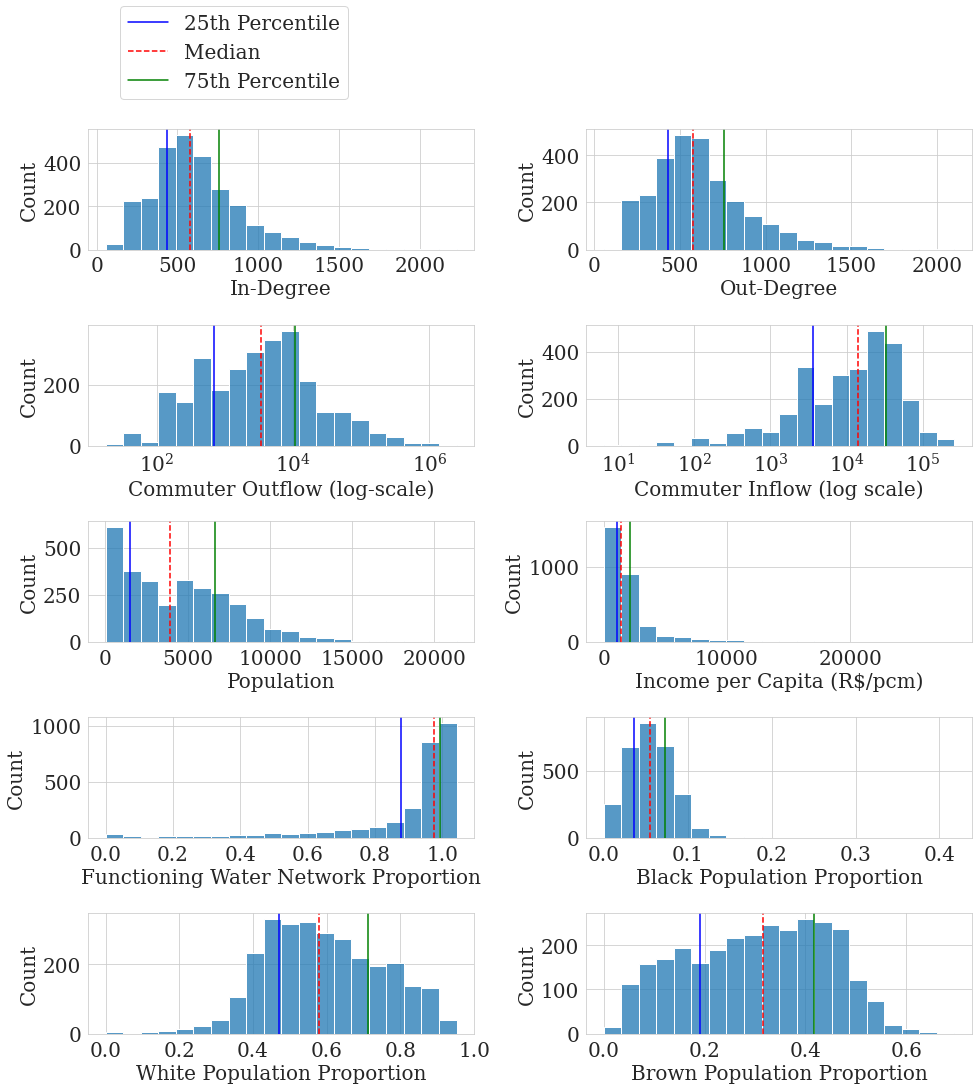

In [198]:
plt.rcParams["font.family"] = "Serif"
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(5, 2, figsize=(14, 16))
sns.set_style('whitegrid')

sns.histplot(in_degree['SOURCE'], ax=ax0, bins=20)
ax0.axvline(x=np.percentile(in_degree['SOURCE'], 25), color='b', label='25th Percentile')
ax0.axvline(x=in_degree['SOURCE'].median(), color='r', label='Median', linestyle='--')
ax0.axvline(x=np.percentile(in_degree['SOURCE'], 75), color='g', label='75th Percentile')
ax0.set_xlabel("In-Degree")
ax0.legend(prop={'size': 20, 'family': 'Serif'})
leg = ax0.get_legend()
leg.set_bbox_to_anchor((0.7, 2.1, 0, 0))

sns.histplot(out_degree['TARGET'], ax=ax1, bins=20)
ax1.axvline(x=np.percentile(out_degree['TARGET'], 25), color='b', label='25th Percentile')
ax1.axvline(x=out_degree['TARGET'].median(), color='r', label='Median', linestyle='--')
ax1.axvline(x=np.percentile(out_degree['TARGET'], 75), color='g', label='75th Percentile')
ax1.set_xlabel("Out-Degree")
#ax1.legend(prop={'size': 20, 'family': 'Serif'})
#leg = ax1.get_legend()
#leg.set_bbox_to_anchor((0.7, 2.1, 0, 0))

sns.histplot(commute_outflow['FLUX'], ax=ax2, log_scale=True, bins=20)
ax2.set_xlabel("Commuter Outflow (log-scale)")
ax2.axvline(x=np.percentile(commute_outflow['FLUX'], 25), color='b', label='25th Percentile')
ax2.axvline(x=commute_outflow['FLUX'].median(), color='r', label='Median', linestyle='--')
ax2.axvline(x=np.percentile(commute_outflow['FLUX'], 75), color='g', label='75th Percentile')
#ax1.legend(fontsize=15)




sns.histplot(commute_inflow['FLUX'], ax=ax3, log_scale=True, bins=20)
ax3.set_xlabel("Commuter Inflow (log scale)")
ax3.axvline(x=np.percentile(commute_inflow['FLUX'], 25), color='b', label='25th Percentile')
ax3.axvline(x=commute_inflow['FLUX'].median(), color='r', label='Median', linestyle='--')
ax3.axvline(x=np.percentile(commute_inflow['FLUX'], 75), color='g', label='75th Percentile')
#ax2.legend(fontsize=15)






sns.histplot(pop['2020_pop_h3'], ax=ax4, bins=20)
ax4.set_xlabel("Population")
ax4.axvline(x=np.percentile(pop['2020_pop_h3'], 25), color='b', label='25th Percentile')
ax4.axvline(x=pop['2020_pop_h3'].median(), color='r', label='Median', linestyle='--')
ax4.axvline(x=np.percentile(pop['2020_pop_h3'], 75), color='g', label='75th Percentile')
#ax3.legend(fontsize=15)




sns.histplot(income['weighted_income_avg_head'], ax=ax5, log_scale=False, bins=20)
ax5.set_xlabel("Income per Capita (R$/pcm)")
ax5.set_xticks([0, 10000, 20000])
ax5.axvline(x=np.percentile(income['weighted_income_avg_head'], 25), color='b', label='25th Percentile')
ax5.axvline(x=income['weighted_income_avg_head'].median(), color='r', label='Median', linestyle='--')
ax5.axvline(x=np.percentile(income['weighted_income_avg_head'], 75), color='g', label='75th Percentile')
#ax4.legend(fontsize=15)




sns.histplot(demographics['weighted_propor_water_network'], ax=ax6, bins=20)
ax6.set_xlabel("Functioning Water Network Proportion")
ax6.axvline(x=np.percentile(demographics['weighted_propor_water_network'], 25), color='b', label='25th Percentile')
ax6.axvline(x=demographics['weighted_propor_water_network'].median(), color='r', label='Median', linestyle='--')
ax6.axvline(x=np.percentile(demographics['weighted_propor_water_network'], 75), color='g', label='75th Percentile')
#ax5.legend(fontsize=15)




sns.histplot(demographics['weighted_propor_black'], ax=ax7, bins=20)
ax7.set_xlabel("Black Population Proportion")
ax7.axvline(x=np.percentile(demographics['weighted_propor_black'], 25), color='b', label='25th Percentile')
ax7.axvline(x=demographics['weighted_propor_black'].median(), color='r', label='Median', linestyle='--')
ax7.axvline(x=np.percentile(demographics['weighted_propor_black'], 75), color='g', label='75th Percentile')
#ax6.legend(fontsize=15)







sns.histplot(demographics['weighted_propor_white'], ax=ax8, bins=20)
ax8.set_xlabel("White Population Proportion")
ax8.axvline(x=np.percentile(demographics['weighted_propor_white'], 25), color='b', label='25th Percentile')
ax8.axvline(x=demographics['weighted_propor_white'].median(), color='r', label='Median', linestyle='--')
ax8.axvline(x=np.percentile(demographics['weighted_propor_white'], 75), color='g', label='75th Percentile')
#ax7.legend(fontsize=15)





sns.histplot(demographics['weighted_propor_brown'], ax=ax9, bins=20)
ax9.set_xlabel("Brown Population Proportion")
ax9.axvline(x=np.percentile(demographics['weighted_propor_brown'], 25), color='b', label='25th Percentile')
ax9.axvline(x=demographics['weighted_propor_brown'].median(), color='r', label='Median', linestyle='--')
ax9.axvline(x=np.percentile(demographics['weighted_propor_brown'], 75), color='g', label='75th Percentile')
#ax8.legend(fontsize=15)
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/hexsums.pdf', dpi=300)
plt.show()


In [194]:
out_degree['TARGET'].describe()

count    2737.000000
mean      617.419803
std       279.770100
min        57.000000
25%       431.000000
50%       580.000000
75%       757.000000
max      2101.000000
Name: TARGET, dtype: float64

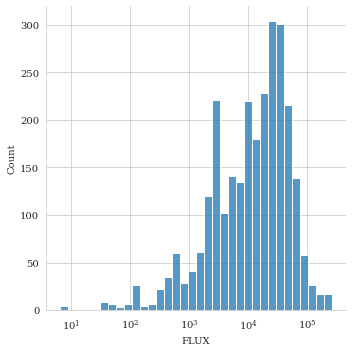

In [102]:
sns.displot(commute_inflow['FLUX'], log_scale=True)

In [33]:
df = pd.DataFrame.from_dict(dic)

In [358]:
stats.percentileofscore(in_degree['SOURCE'], 583)

51.18743149433686

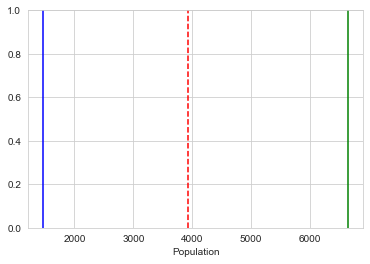

In [189]:
fig, ax4 = plt.subplots()
sns.histplot(pop['2020_pop_h3'], ax=ax3, bins=20)
ax4.set_xlabel("Population")
ax4.axvline(x=np.percentile(pop['2020_pop_h3'], 25), color='b', label='25th Percentile')
ax4.axvline(x=pop['2020_pop_h3'].median(), color='r', label='Median', linestyle='--')
ax4.axvline(x=np.percentile(pop['2020_pop_h3'], 75), color='g', label='75th Percentile')

In [75]:
df.iloc[2:].median(axis=1)

water_under              0.984536
water_over               0.899772
black_under              0.050457
black_over               0.055591
white_over               0.565904
white_under              0.623675
brown_over               0.361724
brown_under              0.270567
pop_over               513.116786
pop_under             4881.485184
income_over           1209.308400
income_under          1607.680744
in_degree_over         244.000000
in_degree_und          673.000000
w_indegree_over        698.917880
w_indegree_under     20312.824039
w_outdegree_over       265.310860
w_outdegree_under     6133.575657
dtype: float64

In [748]:
pd.DataFrame(data = [57, 17, 73, 33, 24, 63, 48, 44, 76, 35, 55, 49.9, 49, 42, 58, 40 ], index= df.iloc[2:].index)

0
black_under        57.0
black_over         17.0
white_over         73.0
white_under        33.0
brown_over         24.0
brown_under        63.0
pop_over           48.0
pop_under          44.0
income_over        76.0
income_under       35.0
in_degree_over     55.0
in_degree_und      49.9
w_indegree_over    49.0
w_indegree_under   42.0
w_outdegree_over   58.0
w_outdegree_under  40.0

In [685]:
pcent = stats.percentileofscore(commute_outflow['FLUX'], 2042.05)




print(pcent)

40.080379978078184


In [682]:
pcent = stats.percentileofscore(commute_inflow['FLUX'], 10475.37)




print(pcent)


42.63792473511143


In [658]:

degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
cluster_df.loc['Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'


commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
cluster_df.loc['Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'


commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
cluster_df.loc['Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'

pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'



income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'




water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
cluster_df.loc['Water Propor.', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'



black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
cluster_df.loc['Black Propor.', i] = str(round(black_propor, 2)) + f' ({str(round(pcent, 1))})'



white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
cluster_df.loc['White Propor.', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'




brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
cluster_df.loc['Brown Propor.', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'

over_series         NaN
under_series        NaN
black_under         NaN
black_over          NaN
white_over          NaN
white_under         NaN
brown_over          NaN
brown_under         NaN
pop_over            NaN
pop_under           NaN
income_over         NaN
income_under        NaN
in_degree_over      NaN
in_degree_und       NaN
w_indegree_over     NaN
w_indegree_under    NaN
w_outdegree_over    NaN
w_outdegree_under   NaN
dtype: float64

In [651]:
df.to_csv('for_outlier_analysis.csv')

In [652]:
from scipy import stats

In [44]:
df = pd.read_csv('for_outlier_analysis.csv')

In [47]:
df.set_index('Unnamed: 0', inplace=True)

In [654]:
df = pd.DataFrame.from_dict(dic).transpose()

66.27694556083303

In [74]:
df.iloc[2:].median(axis=1)

water_under              0.984536
water_over               0.899772
black_under              0.050457
black_over               0.055591
white_over               0.565904
white_under              0.623675
brown_over               0.361724
brown_under              0.270567
pop_over               513.116786
pop_under             4881.485184
income_over           1209.308400
income_under          1607.680744
in_degree_over         244.000000
in_degree_und          673.000000
w_indegree_over        698.917880
w_indegree_under     20312.824039
w_outdegree_over       265.310860
w_outdegree_under     6133.575657
dtype: float64

In [655]:
print(stats.ttest_ind(df['black_under'], df['black_over']))
print(stats.ttest_ind(df['white_over'], df['white_under']))
print(stats.ttest_ind(df['black_under'], df['black_over']))

print(stats.ttest_ind(df['brown_over'], df['brown_under']))

print(stats.ttest_ind(df['pop_over'], df['pop_under']))

print(stats.ttest_ind(df['in_degree_over'], df['in_degree_und']))

print(stats.ttest_ind(df['black_under'], df['black_over']))


print(stats.ttest_ind(df['brown_over'], df['brown_under']))

print(stats.ttest_ind(df['income_over'], df['income_under']))

print(stats.ttest_ind(df['w_indegree_over'], df['w_indegree_under']))

print(stats.ttest_ind(df['w_outdegree_over'], df['w_outdegree_under']))






Ttest_indResult(statistic=131.93482097633236, pvalue=0.0)
Ttest_indResult(statistic=142.92997763907363, pvalue=0.0)
Ttest_indResult(statistic=131.93482097633236, pvalue=0.0)
Ttest_indResult(statistic=-137.57127832746127, pvalue=0.0)
Ttest_indResult(statistic=12.185228934296946, pvalue=1.0156011393772774e-33)
Ttest_indResult(statistic=23.344458822970324, pvalue=5.5552476334985355e-115)
Ttest_indResult(statistic=131.93482097633236, pvalue=0.0)
Ttest_indResult(statistic=-137.57127832746127, pvalue=0.0)
Ttest_indResult(statistic=104.20984263466418, pvalue=0.0)
Ttest_indResult(statistic=22.717275645636136, pvalue=2.9799456145400843e-109)
Ttest_indResult(statistic=53.45049860550884, pvalue=0.0)


In [28]:
df = pd.DataFrame.from_dict(dic)

In [53]:
lst = []
for col in df.columns:
    for item in df.loc['under_series', col]:
        lst.append(item)
    

In [54]:
over = pd.DataFrame(pd.Series(lst).value_counts() / 2736)

In [55]:
over = over.reset_index()

In [56]:
over

index         0
0     2693.0  0.689693
1     1213.0  0.672880
2     1735.0  0.668129
3      193.0  0.635234
4     2511.0  0.622076
...      ...       ...
2732   695.0  0.055190
2733   546.0  0.015716
2734  1238.0  0.015716
2735  2138.0  0.015716
2736  2310.0  0.015716

[2737 rows x 2 columns]

### Plot of Isolation Hexagons

In [57]:
import geopandas as gpd

In [58]:
iso = gpd.read_file(data_path + 'data-raw/cleaned/isolation.shp')

In [59]:
iso_plot = iso.drop_duplicates('h3')

In [60]:
iso_over = gpd.GeoDataFrame(iso_plot, geometry='geometry', crs= {"init": "epsg:4326"})

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [61]:
over = hex_ids.merge(over, left_on='0', right_on='index', how='outer').fillna(0)

In [62]:
over

Unnamed: 0     0  index         0
0     88a8103a51fffff     0    0.0  0.219298
1     88a8102955fffff     1    1.0  0.086988
2     88a81045abfffff     2    2.0  0.202851
3     88a8100327fffff     3    3.0  0.192617
4     88a81000edfffff     4    4.0  0.172515
...               ...   ...    ...       ...
2888  88a8100b4dfffff  2888    0.0  0.000000
2889  88a8101643fffff  2889    0.0  0.000000
2890  88a8101739fffff  2890    0.0  0.000000
2891  88a810a89bfffff  2891    0.0  0.000000
2892  88a812b4d9fffff  2892    0.0  0.000000

[2893 rows x 4 columns]

In [63]:
iso_over

h3          dt                    city  isolated  \
0       88a8103a51fffff  2020-03-19             Carapicuíba  0.343290   
1       88a8102955fffff  2020-03-19         Franco da Rocha  0.326096   
2       88a81045abfffff  2020-03-19                  Suzano  0.363296   
3       88a8100327fffff  2020-03-19   São Bernardo do Campo  0.419984   
4       88a81000edfffff  2020-03-19               São Paulo  0.356494   
...                 ...         ...                     ...       ...   
367925  88a8100b4dfffff  2020-08-09          Ribeirão Pires  0.501047   
375964  88a8101643fffff  2020-07-04              Embu-Guaçu  0.430278   
426484  88a8101739fffff  2020-07-12               São Paulo  0.599942   
458572  88a810a89bfffff  2020-08-15  Vargem Grande Paulista  0.300243   
547194  88a812b4d9fffff  2020-08-18            Santa Isabel  0.301415   

                                                 geometry  
0       POLYGON ((-46.82036 -23.54427, -46.82541 -23.5...  
1       POLYGON ((-46.71925 -23.33228, -46.72430 -23.3...  
2       POLYGON ((-46.29303 -23.51618, -46.29808 -23.5...  
3       POLYGON ((-46.56606 -23.74172, -46.57111 -23.7...  
4       POLYGON ((-46.64712 -23.68740, -46.65217 -23.6...  
...                                                   ...  
367925  POLYGON ((-46.43369 -23.71863, -46.43874 -23.7...  
375964  POLYGON ((-46.81417 -23.84950, -46.81922 -23.8...  
426484  POLYGON ((-46.74574 -23.81297, -46.75079 -23.8...  
458572  POLYGON ((-47.00382 -23.64436, -47.00886 -23.6...  
547194  POLYGON ((-46.23868 -23.33087, -46.24373 -23.3...  

[2893 rows x 5 columns]

In [65]:
iso_over = gpd.GeoDataFrame(iso_over.merge(over, left_on = 'h3', right_on='Unnamed: 0'))

In [66]:
iso_over = iso_over.to_crs(epsg=3857)

In [67]:
import h3
import pandas as pd
import geopandas as gpd
import shapely
import pandas as pd
from shapely.geometry import MultiPolygon, Polygon, Point
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import geobr
import pyreadr
import matplotlib
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker


In [71]:
cmap = matplotlib.cm.get_cmap("inferno")

In [72]:
import matplotlib.colors as colors


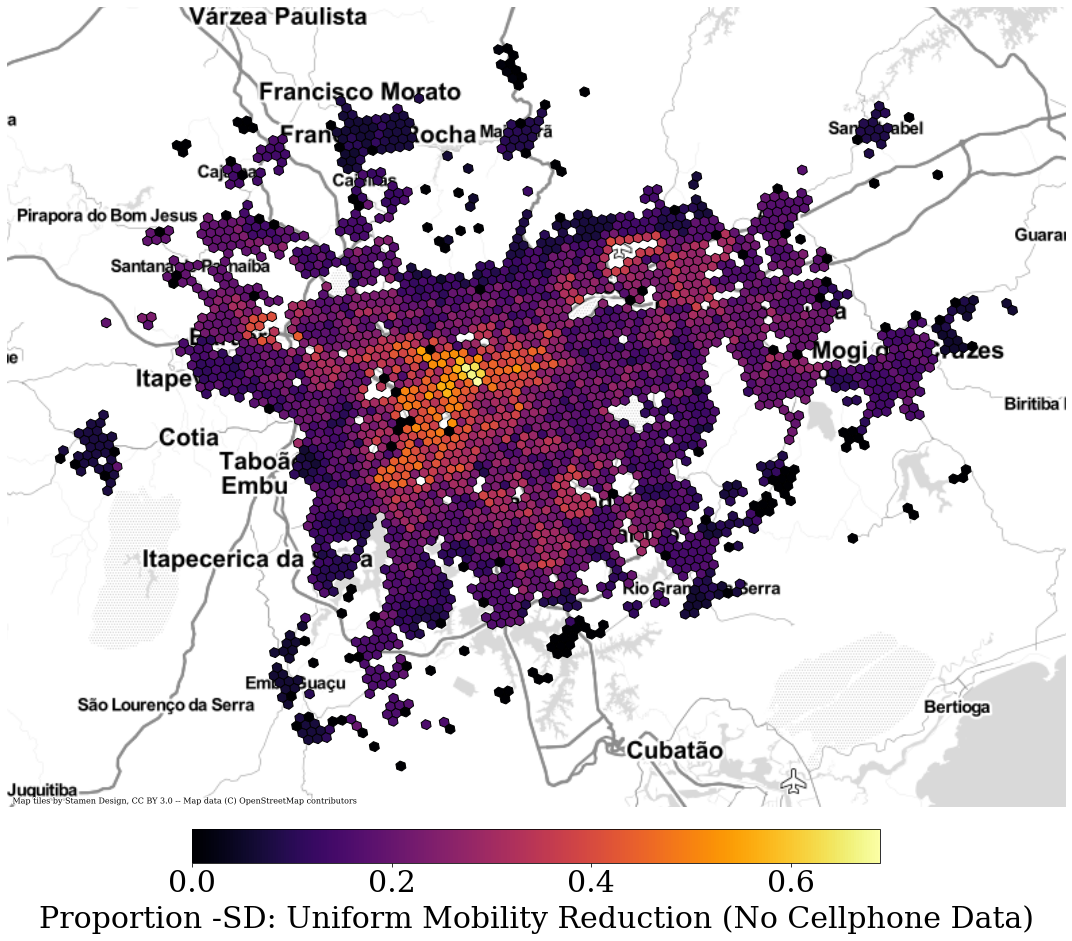

In [87]:
fig, ax = plt.subplots(figsize=(15, 15))
iso_over.plot(alpha=1, edgecolor='k', ax=ax, cmap=cmap, column=0, legend=True, legend_kwds={'shrink': 0.65, 'ticks': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], 'pad': 0.02, 'orientation': 'horizontal'})
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
fig = ax.figure
ax.set_axis_off()
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=30)
cb_ax.set_xlabel("Proportion -SD: Uniform Mobility Reduction (No Cellphone Data)", fontsize=30, labelpad=7)
#cb_ax.set_label("Hello", )
#plt.title("Positive Outbreak Outlier Display", fontsize=30, pad=20)
plt.tight_layout()
#plt.show()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/underoutliers12.pdf', dpi=300)
#When setting each hexagon as an outbreak location, color represents the proportion of recipient regions where the time saved is greater than their mean across all other outbreak locations. (ex. a region with value 1 leads to a greater time saved for 100\% of all other regions)

# Clustering

In [2]:
import sys
sys.path 


['/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Thesis_Code',
 '/Users/shivyucel/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles',
 '/Users/shivyucel/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles/lib/python',
 '/Users/shivyucel/anaconda3/lib/python38.zip',
 '/Users/shivyucel/anaconda3/lib/python3.8',
 '/Users/shivyucel/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/shivyucel/.ipython']

In [3]:
data_path = '/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/'

In [4]:
populations = np.loadtxt(data_path + 'SIR/v1_populations.txt')


In [5]:
populations = pd.Series(populations)


In [6]:
pop_1500 = populations.sort_values(ascending = False).index

In [7]:
pop_1500

Int64Index([2615, 1715,  914, 1635,  456,   20, 1103, 1913, 1743, 1185,
            ...
            1707, 1760, 2553, 2548, 1550, 1918, 1745, 2685, 2656,  760],
           dtype='int64', length=2737)

In [19]:
demographics = pd.read_csv(data_path + '/demographics/h3_demographic.csv')
income = pd.read_csv(data_path + '/demographics/h3_income.csv')
pop = pd.read_csv(data_path + '/population/h3_pop.csv')
zones = np.loadtxt(data_path + '/commuting/lst_of_zones.csv', delimiter=',')
hex_ids = pd.read_csv(data_path + '/commuting/h3_IDs.csv')

In [32]:
glob.glob(data_path + f'SIR/time_saved/new_outlier_outbreaks/*')[0]

'/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/545.csv'

In [33]:
df = pd.read_csv(glob.glob(data_path + f'SIR/time_saved/new_outlier_outbreaks/*')[0])
df.drop('Unnamed: 0', axis=1, inplace=True)


In [40]:
df.columns = zones[df.columns]

In [2]:
df.columns

NameError: name 'df' is not defined

In [36]:
df.columns = df.columns.astype(int)
df = df.reindex(sorted(df.columns), axis=1)

df.columns = zones[df.columns]


0         1        2         3         4          5         6     \
0   9.446626  3.606993  6.10626  2.904107  7.210026  10.386788  5.859623   
1   9.446626  3.606993  6.10626  2.904107  7.210026   7.746495  5.859623   
2   9.446626  3.606993  6.10626  2.904107  7.210026   7.746495  5.859623   
3   9.446626  3.606993  6.10626  2.904107  7.210026   7.746495  5.859623   
4   9.446626  3.606993  6.10626  2.904107  7.162215   7.746495  5.859623   
..       ...       ...      ...       ...       ...        ...       ...   
65       NaN       NaN      NaN       NaN       NaN        NaN       NaN   
66       NaN       NaN      NaN       NaN       NaN        NaN       NaN   
67       NaN       NaN      NaN       NaN       NaN        NaN       NaN   
68       NaN       NaN      NaN       NaN       NaN        NaN       NaN   
69       NaN       NaN      NaN       NaN       NaN        NaN       NaN   

        7         8          9     ...      2727      2728      2729  \
0   8.448428  5.139563  11.479782  ...  1.866018  8.569845  6.671869   
1   8.448428  5.139563  11.479782  ...  1.866018  8.569845  6.671869   
2   8.448428  5.139563  11.479782  ...  1.866018  8.569845  6.671869   
3   8.448428  5.139563  11.479782  ...  1.866018  8.569845  6.671869   
4   8.448428  5.139563  11.479782  ...  1.866018  8.569845  5.130953   
..       ...       ...        ...  ...       ...       ...       ...   
65       NaN       NaN        NaN  ...       NaN       NaN       NaN   
66       NaN       NaN        NaN  ...       NaN       NaN       NaN   
67       NaN       NaN        NaN  ...       NaN       NaN       NaN   
68       NaN       NaN        NaN  ...       NaN       NaN       NaN   
69       NaN       NaN        NaN  ...       NaN       NaN       NaN   

        2730       2731     2732      2733      2734      2735      2736  
0   3.865536  33.448078  7.68486  4.111845  9.784608  6.535242  8.652237  
1   3.865536  33.448078  7.68486  4.111845  9.784608  6.535242  8.652237  
2   3.865536  33.448078  7.68486  4.111845  8.270532  6.535242  8.652237  
3   3.865536  33.448078  7.68486  4.111845  8.270532  6.535242  8.652237  
4   3.865536  33.448078  7.68486  4.111845  8.270532  5.142124  8.652237  
..       ...        ...      ...       ...       ...       ...       ...  
65       NaN   0.000000      NaN       NaN  0.000000       NaN       NaN  
66       NaN   0.000000      NaN       NaN  0.000000       NaN       NaN  
67       NaN   0.000000      NaN       NaN  0.000000       NaN       NaN  
68       NaN   0.000000      NaN       NaN  0.000000       NaN       NaN  
69       NaN   0.000000      NaN       NaN       NaN       NaN       NaN  

[70 rows x 2736 columns]

In [9]:
all_timesaved_means = pd.DataFrame()
count = 0
for file in glob.glob(data_path + f'SIR/time_saved/new_outlier_outbreaks/*')[0]:
    key = file.split('/')[-1][:-4]
    df = pd.read_csv(file)
    df = pd.DataFrame(df.loc[:, df.columns.isin(pop_1500.astype(str))].median(axis=1))
    df.columns = [key]
    all_timesaved_means = pd.concat([all_timesaved_means, df], axis=1)
    print(count)
    count += 1

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [267]:
glob.glob(data_path + f'SIR/time_saved/new_outlier_outbreaks/*.csv')

['/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/545.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/223.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/237.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/551.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/579.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/2282.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/1953.csv',
 '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/SIR/time_saved/new_outlier_outbreaks/1947.csv',
 '/Users/shiv

In [278]:
grouped = all_timesaved_means.copy()

In [280]:
grouped.columns = grouped.columns.astype(int)
grouped = grouped.reindex(sorted(grouped.columns), axis=1)

In [49]:
grouped.to_csv(data_path + 'SIR/time_saved/DPED/new_new_all_median_time_saved.csv')

In [1]:
import sys
sys.path

['/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Thesis_Code',
 '/Users/shivyucel/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles',
 '/Users/shivyucel/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles/lib/python',
 '/Users/shivyucel/anaconda3/lib/python38.zip',
 '/Users/shivyucel/anaconda3/lib/python3.8',
 '/Users/shivyucel/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/shivyucel/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/shivyucel/.ipython']

In [8]:
path = '/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Data/h3'


In [9]:
import pandas as pd

In [10]:
grouped = pd.read_csv(path + '/SIR/time_saved/DPED/new_new_all_median_time_saved.csv')
grouped.drop('Unnamed: 0', axis=1 ,inplace=True)

In [11]:
grouped

0         1         2         3         4         5         6  \
0   8.915617  8.740944  8.183235  8.194466  7.804234  6.112432  9.061758   
1   8.850136  8.653623  8.128134  8.130351  7.755135  6.055755  9.021061   
2   8.741618  8.492949  8.057240  8.044938  7.657023  5.970989  8.945581   
3   8.656734  8.305085  7.940940  7.966424  7.449722  5.855408  8.877021   
4   8.510180  8.044690  7.788910  7.825271  7.259775  5.709146  8.794751   
..       ...       ...       ...       ...       ...       ...       ...   
65  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
66  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
67  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
68  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
69  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           7         8         9  ...      2727      2728      2729      2730  \
0   8.139830  6.301668  8.433117  ...  7.319594  8.762037  7.597808  8.524613   
1   8.078693  6.245056  8.379021  ...  7.258806  8.696761  7.547417  8.464262   
2   7.983677  6.148490  8.296883  ...  7.198338  8.620303  7.498401  8.392017   
3   7.842908  6.046442  8.221266  ...  7.080659  8.542452  7.404044  8.300213   
4   7.685062  5.960506  8.127144  ...  6.944271  8.371203  7.227159  8.149969   
..       ...       ...       ...  ...       ...       ...       ...       ...   
65  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
66  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
67  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
68  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
69  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

        2731      2732      2733      2734      2735      2736  
0   8.234648  8.924174  6.989793  9.219935  6.967859  8.779028  
1   8.184239  8.852489  6.948484  9.162407  6.937234  8.713574  
2   8.096018  8.753362  6.887626  9.081322  6.882385  8.599260  
3   7.972402  8.614681  6.759974  8.964132  6.812827  8.525641  
4   7.845483  8.353027  6.629887  8.867384  6.685733  8.414862  
..       ...       ...       ...       ...       ...       ...  
65  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
66  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
67  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
68  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
69  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[70 rows x 2737 columns]

In [6]:
grouped = grouped.fillna(0)

In [7]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
...                       random_state=0).fit_predict(grouped.transpose())

In [8]:
grouped

NameError: name 'grouped' is not defined

NameError: name 'grouped' is not defined

In [11]:
arr = np.select([arr == 1, arr == 2, arr == 3], [2, 3, 1], arr)

In [12]:
data_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/'

demo = pd.read_csv(data_path + 'h3/demographics/h3_demographic.csv')

income = pd.read_csv(data_path + 'h3/demographics/h3_income.csv')

pops = pd.read_csv(data_path + 'h3/population/h3_pop.csv')



ids = pd.read_csv(data_path + 'h3/commuting/h3_ids.csv')
ids.rename(columns={'Unnamed: 0': 'hex_id'}, inplace=True)

zones = np.loadtxt(data_path + 'h3/commuting/lst_of_zones.csv', delimiter=',')
ids = ids[ids['0'].isin(zones)]

commute_outflow = pd.read_csv(data_path + f'h3/commuting/commuting_sums.csv')
commute_outflow = commute_outflow.merge(ids, left_on='SOURCE', right_on='0')
    
commute_inflow = pd.read_csv(data_path + f'h3/commuting/commuting_inflow.csv')
commute_inflow = commute_inflow.merge(ids, left_on='TARGET', right_on='0')

commute = pd.read_csv('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/commuting/clean_h3_commute_Tij_radiation.csv')
in_degree = pd.DataFrame(commute.groupby('TARGET').count()).reset_index()
in_degree = in_degree.merge(ids, left_on='TARGET', right_on='0')[['0', 'SOURCE', 'hex_id']]

out_degree = pd.DataFrame(commute.groupby('SOURCE').count()).reset_index()
out_degree = out_degree.merge(ids, left_on='SOURCE', right_on='0')[['0', 'TARGET', 'hex_id']]

In [13]:
grouped.columns = ids['hex_id']

In [14]:
plt.rcParams["font.family"] = "Serif"

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data_path

'/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/'

In [17]:
from scipy.stats import linregress

In [18]:

in_degree = pd.read_csv('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/commuting/clean_h3_commute_Tij_radiation.csv')
in_degree.drop_duplicates(['SOURCE', 'TARGET'], inplace=True)
in_degree = pd.DataFrame(in_degree.groupby('TARGET').count()).reset_index()
in_degree = in_degree.merge(ids, left_on='TARGET', right_on='0')[['0', 'SOURCE', 'hex_id']]


out_degree = pd.read_csv('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/h3/commuting/clean_h3_commute_Tij_radiation.csv')
out_degree.drop_duplicates(['SOURCE', 'TARGET'], inplace=True)
out_degree = pd.DataFrame(out_degree.groupby('SOURCE').count()).reset_index()
out_degree = out_degree.merge(ids, left_on='SOURCE', right_on='0')[['0', 'TARGET', 'hex_id']]


In [121]:
pcent = stats.percentileofscore(out_degree['TARGET'], degree_out)



NameError: name 'degree_out' is not defined

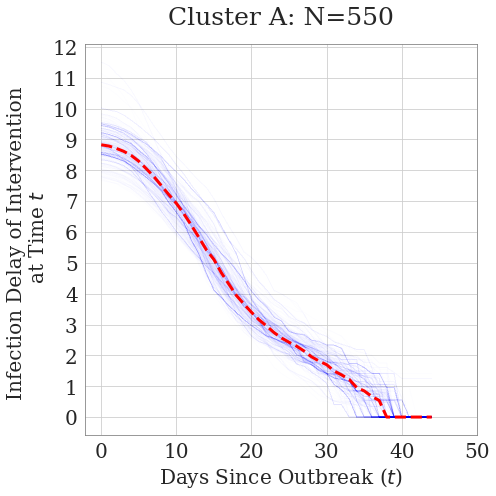

1
In-Degree Centrality     366.0 (16.3)
Out-Degree Centrality    362.0 (16.1)
Commuter Outflow       1095.86 (30.3)
Commuter Inflow         7892.3 (36.2)
Population             2890.27 (41.0)
Income                 1172.75 (36.5)
Water Proportion          0.97 (43.5)
Black Proportion         0.061 (58.8)
White Proportion          0.53 (39.6)
Brown Proportion          0.36 (61.0)

In [129]:
cluster_df = pd.DataFrame()
sns.set_style('whitegrid')
letter_list = ['A', 'B', 'C']
i = 1
plt.rcParams["font.family"] = "Serif"
plot_dict ={}
fig, ax = plt.subplots(figsize=(7, 7))
indx = np.where(arr == i)[0]

median = grouped.iloc[:45, indx].median(axis=1)
grouped.iloc[:45, indx].plot(ax=ax, alpha=0.007, c = 'b', linewidth=1)
median.plot(ax=ax, c = 'r', linestyle = '--', linewidth=3)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster {letter_list[i-1]}: N={len(indx)}", fontsize=25, pad=20)
ax.get_legend().remove()
ax.set_ylabel("Infection Delay of Intervention \n at Time $t$", fontsize=20)
ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
ax.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel("Days Since Outbreak ($t$)", fontsize=20)
#ax.axhline(y=grouped.iloc[0, indx].mean())
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/c1.pdf', dpi=300)
plt.show()

slic = grouped.iloc[:, indx]
    
slic = pd.DataFrame(slic.transpose().index)

degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
cluster_df.loc['In-Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'

degree_out = slic.merge(out_degree, left_on='hex_id', right_on='hex_id')['TARGET'].median()
pcent = stats.percentileofscore(out_degree['TARGET'], degree_out)
cluster_df.loc['Out-Degree Centrality', i] = str(round(degree_out, 2)) + f' ({str(round(pcent, 1))})'



commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
cluster_df.loc['Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'


commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
cluster_df.loc['Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'

pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'



income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'




water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
cluster_df.loc['Water Proportion', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'



black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
cluster_df.loc['Black Proportion', i] = str(round(black_propor, 3)) + f' ({str(round(pcent, 1))})'



white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
cluster_df.loc['White Proportion', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'




brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
cluster_df.loc['Brown Proportion', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'




display(cluster_df)

In [734]:
linregress(median.index, median.values)

LinregressResult(slope=-0.22885277450578928, intercept=8.79455077722973, rvalue=-0.9838751356493355, pvalue=8.854140658441737e-34, stderr=0.006344350543870197, intercept_stderr=0.16208129105115213)

In [735]:
print(median[median <= 9].reset_index().iloc[0, 0])
print(median[median <= 8].reset_index().iloc[0, 0])
print(median[median <= 7].reset_index().iloc[0, 0])
print(median[median <= 6].reset_index().iloc[0, 0])
print(median[median <= 5].reset_index().iloc[0, 0])
print(median[median <= 4].reset_index().iloc[0, 0])
print(median[median <= 3].reset_index().iloc[0, 0])
print(median[median <= 2].reset_index().iloc[0, 0])
print(median[median <= 1].reset_index().iloc[0, 0])
print(median[median <= 0].reset_index().iloc[0, 0])

0
7
10
13
16
18
22
28
34
39


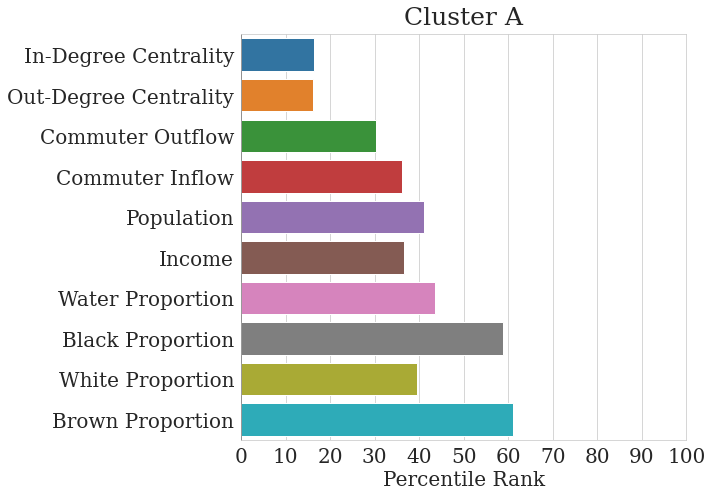

In [130]:
sns.set_style('whitegrid')
cluster_df['pctl'] = [float(x[-5:-1]) for x in cluster_df[1]]
new= cluster_df[['pctl']].unstack().reset_index()
plt.rcParams["font.family"] = "Serif"

fig, ax = plt.subplots(figsize = (10 ,7))

sns.barplot(data = new, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False, palette = 'tab10')
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster A", fontsize=25, pad=10)
plt.xlabel('Percentile Rank', fontsize=20)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/c1_demos.pdf', dpi=300)



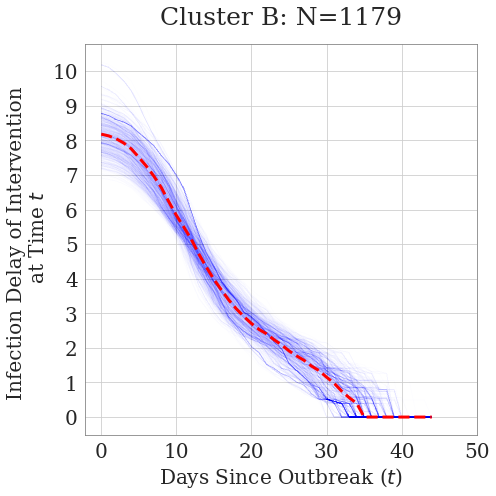

2
In-Degree Centrality      567.0 (47.5)
Out-Degree Centrality     566.0 (47.6)
Commuter Outflow        3138.16 (48.1)
Commuter Inflow        13807.57 (49.3)
Population              4468.21 (53.1)
Income                  1331.55 (48.3)
Water Proportion           0.98 (52.0)
Black Proportion           0.06 (54.1)
White Proportion           0.56 (46.5)
Brown Proportion           0.33 (52.9)

In [36]:
cluster_df = pd.DataFrame()
i = 2
plot_dict ={}
fig, ax = plt.subplots(figsize=(7, 7))
indx = np.where(arr == i)[0]

median = grouped.iloc[:45, indx].median(axis=1)
grouped.iloc[:45, indx].plot(ax=ax, alpha=0.007, c = 'b', linewidth=1)
median.plot(ax=ax, c = 'r', linestyle = '--', linewidth=3)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster B: N={len(indx)}", fontsize=25, pad=20)
ax.get_legend().remove()
ax.set_ylabel("Infection Delay of Intervention \n at Time $t$", fontsize=20)
ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
ax.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlabel("Days Since Outbreak ($t$)", fontsize=20)
#ax.axhline(y=grouped.iloc[0, indx].mean())
plt.tight_layout()
#plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/c2.pdf', dpi=300)
plt.show()

slic = grouped.iloc[:, indx]
    
slic = pd.DataFrame(slic.transpose().index)

degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
cluster_df.loc['In-Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'

degree_out = slic.merge(out_degree, left_on='hex_id', right_on='hex_id')['TARGET'].median()
pcent = stats.percentileofscore(out_degree['TARGET'], degree_out)
cluster_df.loc['Out-Degree Centrality', i] = str(round(degree_out, 2)) + f' ({str(round(pcent, 1))})'


commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
cluster_df.loc['Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'


commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
cluster_df.loc['Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'

pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'



income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'




water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
cluster_df.loc['Water Proportion', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'



black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
cluster_df.loc['Black Proportion', i] = str(round(black_propor, 2)) + f' ({str(round(pcent, 1))})'



white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
cluster_df.loc['White Proportion', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'




brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
cluster_df.loc['Brown Proportion', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'




display(cluster_df)

In [26]:
linregress(median.index, median.values)

LinregressResult(slope=-0.2103040719942403, intercept=7.762818783607735, rvalue=-0.9732902299724681, pvalue=4.110714237059124e-29, stderr=0.00756487310169344, intercept_stderr=0.19326239785808605)

In [27]:
print(median[median <= 8].reset_index().iloc[0, 0])
print(median[median <= 7].reset_index().iloc[0, 0])
print(median[median <= 6].reset_index().iloc[0, 0])
print(median[median <= 5].reset_index().iloc[0, 0])
print(median[median <= 4].reset_index().iloc[0, 0])
print(median[median <= 3].reset_index().iloc[0, 0])
print(median[median <= 2].reset_index().iloc[0, 0])
print(median[median <= 1].reset_index().iloc[0, 0])


3
7
10
13
15
19
25
31


In [28]:
sns.set_style('whitegrid')

In [37]:
plt.rcParams["font.family"] = "Serif"

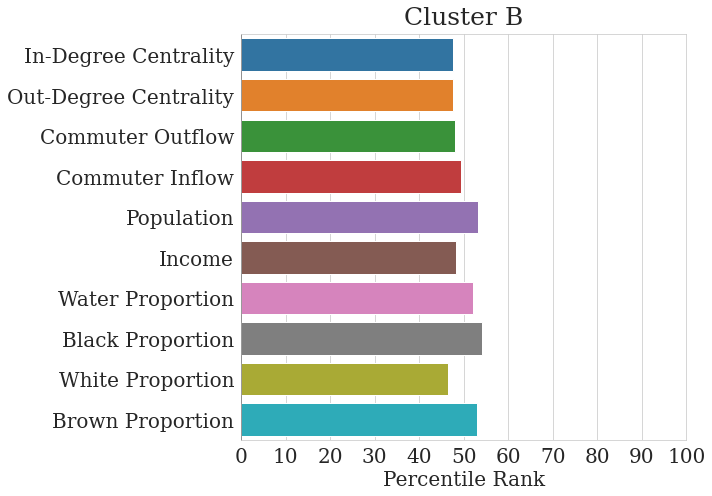

In [38]:
cluster_df['pctl'] = [float(x[-5:-1]) for x in cluster_df[2]]
new= cluster_df[['pctl']].unstack().reset_index()


fig, ax = plt.subplots(figsize = (10 ,7))

sns.barplot(data = new, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False, palette='tab10')
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster B", fontsize=25, pad=10)

plt.xlabel('Percentile Rank', fontsize=20)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/new_c2_demos.pdf', dpi=300)



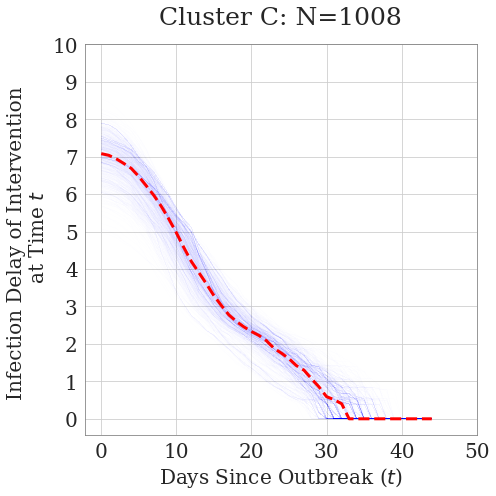

3
In-Degree Centrality      788.0 (77.6)
Out-Degree Centrality     796.0 (78.5)
Commuter Outflow        7360.12 (66.3)
Commuter Inflow        21343.39 (60.4)
Population              4565.34 (54.4)
Income                  1729.02 (65.5)
Water Proportion           0.98 (55.9)
Black Proportion           0.05 (42.2)
White Proportion           0.64 (63.2)
Brown Proportion           0.25 (35.5)

In [39]:
cluster_df = pd.DataFrame()
i = 3
plot_dict ={}
fig, ax = plt.subplots(figsize=(7, 7))
indx = np.where(arr == i)[0]

median = grouped.iloc[:45, indx].median(axis=1)
grouped.iloc[:45, indx].plot(ax=ax, alpha=0.003, c = 'b', linewidth=1)
median.plot(ax=ax, c = 'r', linestyle = '--', linewidth=3)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster C: N={len(indx)}", fontsize=25, pad=20)
ax.get_legend().remove()
ax.set_ylabel("Infection Delay of Intervention \n at Time $t$", fontsize=20)
ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
ax.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlabel("Days Since Outbreak ($t$)", fontsize=20)
#ax.axhline(y=grouped.iloc[0, indx].mean())
plt.tight_layout()
#plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/c3.pdf', dpi=300)
plt.show()


slic = grouped.iloc[:, indx]
    
slic = pd.DataFrame(slic.transpose().index)

degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
cluster_df.loc['In-Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'

degree_out = slic.merge(out_degree, left_on='hex_id', right_on='hex_id')['TARGET'].median()
pcent = stats.percentileofscore(out_degree['TARGET'], degree_out)
cluster_df.loc['Out-Degree Centrality', i] = str(round(degree_out, 2)) + f' ({str(round(pcent, 1))})'


commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
cluster_df.loc['Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'


commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
cluster_df.loc['Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'

pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'



income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'




water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
cluster_df.loc['Water Proportion', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'



black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
cluster_df.loc['Black Proportion', i] = str(round(black_propor, 2)) + f' ({str(round(pcent, 1))})'



white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
cluster_df.loc['White Proportion', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'




brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
cluster_df.loc['Brown Proportion', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'




display(cluster_df)

In [40]:
linregress(median.index, median.values)

LinregressResult(slope=-0.18286828831716018, intercept=6.637656681545632, rvalue=-0.9684241469478215, pvalue=1.4310812235585416e-27, stderr=0.00717919005248094, intercept_stderr=0.18340922122154205)

In [41]:
print(median[median <= 8].reset_index().iloc[0, 0])
print(median[median <= 7].reset_index().iloc[0, 0])
print(median[median <= 6].reset_index().iloc[0, 0])
print(median[median <= 5].reset_index().iloc[0, 0])
print(median[median <= 4].reset_index().iloc[0, 0])
print(median[median <= 3].reset_index().iloc[0, 0])
print(median[median <= 2].reset_index().iloc[0, 0])
print(median[median <= 1].reset_index().iloc[0, 0])


0
2
7
10
13
17
23
29


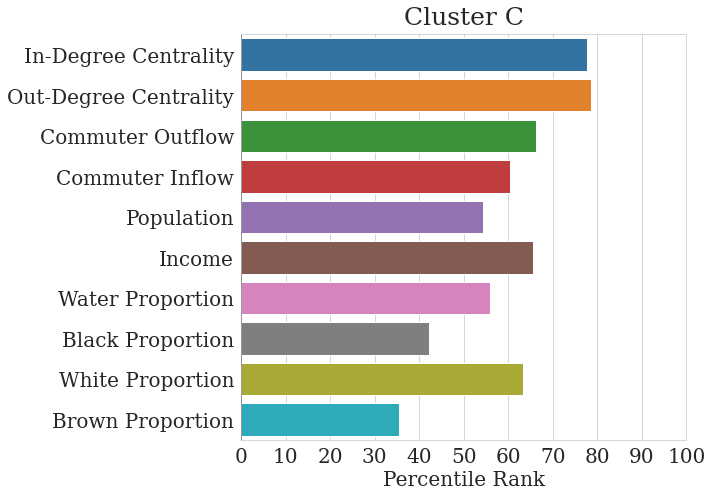

In [42]:
cluster_df['pctl'] = [float(x[-5:-1]) for x in cluster_df[3]]
new= cluster_df[['pctl']].unstack().reset_index()


fig, ax = plt.subplots(figsize = (10 ,7))

sns.barplot(data = new, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False, palette='tab10')
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster C", fontsize=25, pad=10)

plt.xlabel('Percentile Rank', fontsize=20)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/thesis_template/IMG/new_c3_demos.pdf', dpi=300)



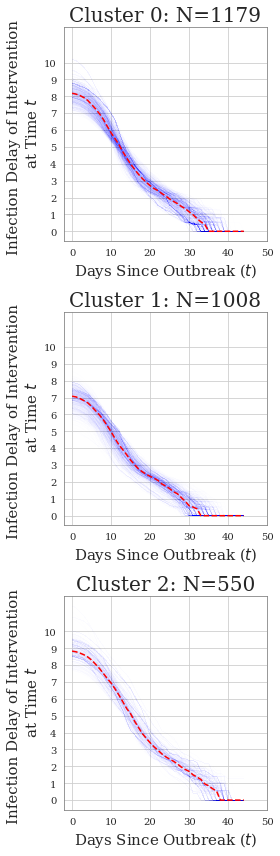

Empty DataFrame
Columns: []
Index: []

In [350]:

sns.set_style('whitegrid')

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Serif"

grouped.columns = ids['hex_id']
plot_dict = {}

fig, (ax0, ax1, ax2)= plt.subplots(3, 1 , figsize=(4, 12), sharey= True)
x = (ax0, ax1, ax2)




clusters = pd.Series(arr).unique()
clusters.sort()
cluster_df = pd.DataFrame()

for i in pd.Series(arr).unique():
    ax = x[i]
    indx = np.where(arr == i)[0]
    
    plot_dict[i] = grouped.iloc[:45, indx].median(axis=1)
    grouped.iloc[:45, indx].plot(ax=ax, alpha=0.002, c = 'b', linewidth=1)


    plot_dict[i].plot(ax=ax, c = 'r', linestyle = '--')

    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    ax.set_title(f"Cluster {i}: N={len(indx)}", fontsize=20)
    ax.get_legend().remove()
    ax.set_ylabel("Infection Delay of Intervention \n at Time $t$", fontsize=15)
    ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
    ax.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    ax.set_xlabel("Days Since Outbreak ($t$)", fontsize=15)
    #ax.axhline(y=grouped.iloc[0, indx].mean())
    slic = grouped.iloc[:, indx]
    
    slic = pd.DataFrame(slic.transpose().index)
   


    #degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
    #pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
    #cluster_df.loc['In-Degree', i] = round(pcent, 2)
    #
    #commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    #pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
    #cluster_df.loc['Agg. Commuter Inflow', i] = round(pcent, 2)
#
    #
    #commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    #pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
    #cluster_df.loc['Agg. Commuter Outflow', i] = round(pcent, 2)
    #
    #
    #pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
    #pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
    #cluster_df.loc['Population', i] = round(pcent, 2)
#
    #   
    #income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
    #pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
    #cluster_df.loc['Income', i] = round(pcent, 2)
    #
    #
    #water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
    #pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
    #cluster_df.loc['Water Propor.', i] = round(pcent, 2)
    #
#
#
    #black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
    #pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
    #cluster_df.loc['Black Propor.', i] = round(pcent, 2)
    #
    #
    #white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
    #pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
    #cluster_df.loc['White Propor.', i] = round(pcent, 2)
    #
    #
    #brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
    #pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
    #cluster_df.loc['Brown Propor.', i] = round(pcent, 2)
#
    #
    #indig_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_indigenous'].median()
    #indig_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_indigenous'].median()


    #cluster_df.loc['Median Indigenous Proportion', i] = indig_propor


plt.tight_layout()
#plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/images/median_4_clusters_all.png', dpi=300)
plt.show()
cluster_df.columns =cluster_df.columns.sort_values()
display(cluster_df)

In [82]:

indx = np.where(arr == 0)[0]

plot_dict[i] = grouped.iloc[:45, indx].median(axis=1)
grouped.iloc[:45, indx].plot(ax=ax, alpha=0.002, c = 'b', linewidth=1)


plot_dict[i].plot(ax=ax, c = 'r', linestyle = '--')

ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.set_title(f"Cluster {i}: N={len(indx)}")
ax.get_legend().remove()
ax.set_ylabel("Delay of Infection")
ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
ax.set_yticks(ticks = [0, 1, 2, 3, 4, 5])
ax.set_xlabel("Days Since Outbreak")
#ax.axhline(y=grouped.iloc[0, indx].mean())
slic = grouped.iloc[:, indx]
slic = pd.DataFrame(slic.transpose().index)

degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
cluster_df.loc['Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'


commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
cluster_df.loc['Agg. Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'


commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
cluster_df.loc['Agg. Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'

pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'



income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'



#
#water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
#pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
#cluster_df.loc['Water Propor.', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'


#
#black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
#pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
#cluster_df.loc['Black Propor.', i] = str(round(black_propor, 2)) + f' ({str(round(pcent, 1))})'

#
#
#white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
#pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
#cluster_df.loc['White Propor.', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'



#
#brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
#pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
#cluster_df.loc['Brown Propor.', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'

In [292]:
grouped.columns = ids['hex_id']

In [359]:
grouped_t = grouped.transpose()

In [360]:
grouped_t

0         1         2         3         4         5   \
hex_id                                                                        
88a8103a51fffff  8.915617  8.850136  8.741618  8.656734  8.510180  8.301525   
88a8102955fffff  8.740944  8.653623  8.492949  8.305085  8.044690  7.733312   
88a81045abfffff  8.183235  8.128134  8.057240  7.940940  7.788910  7.567632   
88a8100327fffff  8.194466  8.130351  8.044938  7.966424  7.825271  7.541534   
88a81000edfffff  7.804234  7.755135  7.657023  7.449722  7.259775  7.016584   
...                   ...       ...       ...       ...       ...       ...   
88a8106327fffff  8.924174  8.852489  8.753362  8.614681  8.353027  7.998393   
88a8107aabfffff  6.989793  6.948484  6.887626  6.759974  6.629887  6.425119   
88a810a893fffff  9.219935  9.162407  9.081322  8.964132  8.867384  8.649679   
88a8100b41fffff  6.967859  6.937234  6.882385  6.812827  6.685733  6.518659   
88a8102355fffff  8.779028  8.713574  8.599260  8.525641  8.414862  8.216149   

                       6         7         8         9   ...   60   61   62  \
hex_id                                                   ...                  
88a8103a51fffff  8.134729  7.903325  7.590266  7.089483  ...  0.0  0.0  0.0   
88a8102955fffff  7.336354  6.957822  6.569220  6.256583  ...  0.0  0.0  0.0   
88a81045abfffff  7.380038  7.117975  6.888398  6.477625  ...  0.0  0.0  0.0   
88a8100327fffff  7.300886  6.993345  6.630678  6.207059  ...  0.0  0.0  0.0   
88a81000edfffff  6.657091  6.310587  5.954341  5.674995  ...  0.0  0.0  0.0   
...                   ...       ...       ...       ...  ...  ...  ...  ...   
88a8106327fffff  7.721705  7.361883  6.947226  6.661299  ...  0.0  0.0  0.0   
88a8107aabfffff  6.178414  5.951767  5.609266  5.221291  ...  0.0  0.0  0.0   
88a810a893fffff  8.447963  8.181314  7.882914  7.584906  ...  0.0  0.0  0.0   
88a8100b41fffff  6.342100  6.168868  5.965235  5.687802  ...  0.0  0.0  0.0   
88a8102355fffff  8.039562  7.846363  7.560074  7.322217  ...  0.0  0.0  0.0   

                  63   64   65   66   67   68   69  
hex_id                                              
88a8103a51fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a8102955fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a81045abfffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a8100327fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a81000edfffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  
88a8106327fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a8107aabfffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a810a893fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a8100b41fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88a8102355fffff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2737 rows x 70 columns]

In [302]:
arr

array([0, 2, 0, ..., 2, 1, 0])

In [361]:
grouped_t['cluster'] = arr

In [310]:
test = grouped_t.iloc[indx]
indx = np.where(arr == 0)[0]


In [334]:
indx = np.where(arr == 0)[0]

In [335]:
test = grouped_t.iloc[indx]

In [336]:
gdf = test.merge(in_degree, left_index=True, right_on='hex_id')

In [337]:
gdf['SOURCE'].median()

1546.5

In [338]:
pcent = stats.percentileofscore(in_degree['SOURCE'], 1546.5)

In [339]:
pcent

74.64377055169894

In [252]:
gdf = gpd.GeoDataFrame(gdf)

<AxesSubplot:>

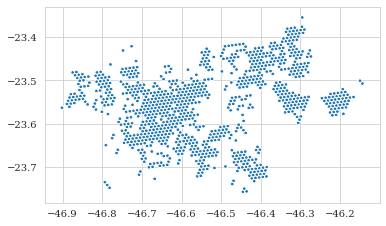

In [253]:
gdf.plot()

In [57]:
import scipy.stats as stats

In [73]:
x= asdf.unique()

In [74]:
x.sort()

In [75]:
x

array([0, 1, 2, 3])

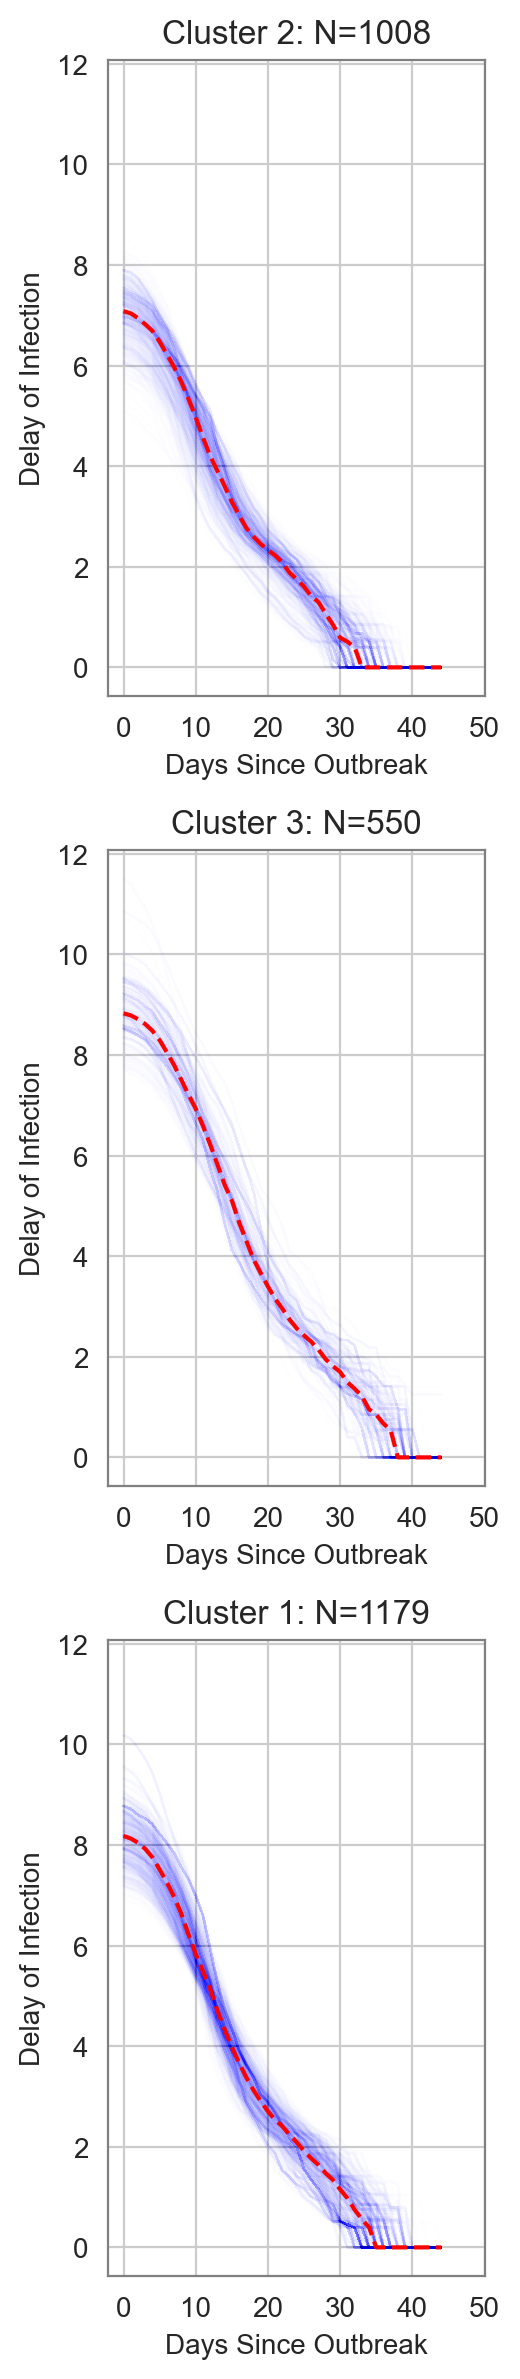

0                1               2    3
Degree Centrality         974.0 (46.8)    1546.5 (74.6)    562.5 (20.5)  NaN
Agg. Commuter Outflow   3138.16 (48.1)   7360.12 (66.3)  1095.86 (30.3)  NaN
Agg. Commuter Inflow   13807.57 (49.3)  21343.39 (60.4)   7892.3 (36.2)  NaN
Population              4468.21 (53.1)   4565.34 (54.4)  2890.27 (41.0)  NaN
Income                  1331.55 (48.3)   1729.02 (65.5)  1172.75 (36.5)  NaN
Water Propor.              0.98 (52.0)      0.98 (55.9)     0.97 (43.5)  NaN
Black Propor.              0.06 (54.1)      0.05 (42.2)     0.06 (58.8)  NaN
White Propor.              0.56 (46.5)      0.64 (63.2)     0.53 (39.6)  NaN
Brown Propor.              0.33 (52.9)      0.25 (35.5)     0.36 (61.0)  NaN

In [59]:

sns.set_style('whitegrid')


grouped.columns = ids['hex_id']
plot_dict = {}

fig, (ax0, ax1, ax2)= plt.subplots(3, 1 , figsize=(2.7, 12), sharey= True)
x = (ax0, ax1, ax2)




clusters = pd.Series(arr).unique()
clusters.sort()
cluster_df = pd.DataFrame(columns = [0, 1, 2, 3])
asdf = pd.Series(arr)
pp = asdf.unique()
pp.sort()
for i in pp:
    ax = x[i - 1]
    indx = np.where(arr == i)[0]
    
    plot_dict[i] = grouped.iloc[:45, indx].median(axis=1)
    grouped.iloc[:45, indx].plot(ax=ax, alpha=0.002, c = 'b', linewidth=1)


    plot_dict[i].plot(ax=ax, c = 'r', linestyle = '--')

    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    ax.set_title(f"Cluster {i + 1}: N={len(indx)}")
    ax.get_legend().remove()
    ax.set_ylabel("Delay of Infection")
    ax.set_xticks(ticks = [0, 10, 20, 30, 40, 50])
    ax
    ax.set_xlabel("Days Since Outbreak")
    #ax.axhline(y=grouped.iloc[0, indx].mean())
    slic = grouped.iloc[:, indx]
    
    slic = pd.DataFrame(slic.transpose().index)
   
    degree_in = slic.merge(in_degree, left_on='hex_id', right_on='hex_id')['SOURCE'].median()
    pcent = stats.percentileofscore(in_degree['SOURCE'], degree_in)
    cluster_df.loc['Degree Centrality', i] = str(round(degree_in, 2)) + f' ({str(round(pcent, 1))})'
    
    
    commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    pcent = stats.percentileofscore(commute_outflow['FLUX'], commute_out)
    cluster_df.loc['Agg. Commuter Outflow', i] =str(round(commute_out, 2)) + f' ({str(round(pcent, 1))})'
    
    
    commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    pcent = stats.percentileofscore(commute_inflow['FLUX'], commute_in)
    cluster_df.loc['Agg. Commuter Inflow', i] = str(round(commute_in, 2)) + f' ({str(round(pcent, 1))})'
    
    pop = slic.merge(pops, left_on='hex_id', right_on='h3')['2020_pop_h3'].median()
    pcent = stats.percentileofscore(pops['2020_pop_h3'], pop)
    cluster_df.loc['Population', i] = str(round(pop, 2)) + f' ({str(round(pcent, 1))})'


    
    income_mean = slic.merge(income, left_on='hex_id', right_on='h3')['weighted_income_avg_head'].median()
    pcent = stats.percentileofscore(income['weighted_income_avg_head'], income_mean)
    cluster_df.loc['Income', i] = str(round(income_mean, 2)) + f' ({str(round(pcent, 1))})'



    
    water_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_water_network'].median()
    pcent = stats.percentileofscore(demo['weighted_propor_water_network'], water_propor)
    cluster_df.loc['Water Propor.', i] = str(round(water_propor, 2)) + f' ({str(round(pcent, 1))})'


    
    black_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_black'].median()
    pcent = stats.percentileofscore(demo['weighted_propor_black'], black_propor)
    cluster_df.loc['Black Propor.', i] = str(round(black_propor, 2)) + f' ({str(round(pcent, 1))})'

    
    
    white_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_white'].median()
    pcent = stats.percentileofscore(demo['weighted_propor_white'], white_propor)
    cluster_df.loc['White Propor.', i] = str(round(white_propor, 2)) + f' ({str(round(pcent, 1))})'



    
    brown_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_brown'].median()
    pcent = stats.percentileofscore(demo['weighted_propor_brown'], brown_propor)
    cluster_df.loc['Brown Propor.', i] = str(round(brown_propor, 2)) + f' ({str(round(pcent, 1))})'



    
    
    

    
    #degree_out = slic.merge(out_degree, left_on='hex_id', right_on='hex_id')['TARGET'].median()
    #pcent = stats.percentileofscore(out_degree['TARGET'], degree_in)
    #cluster_df.loc['Out-Degree', i] = str(round(degree_out, 2)) + f' ({str(round(pcent, 1))})'
    #
    
    #commute_out = slic.merge(commute_outflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    #cluster_df.loc['Agg. Commute Outflow', i] = commute_out
    #
    #commute_in = slic.merge(commute_inflow, left_on='hex_id', right_on='hex_id')['FLUX'].median()
    #cluster_df.loc['Agg. Commute Inflow', i] = commute_in
    
    #indig_propor = slic.merge(demo, left_on='hex_id', right_on='h3')['weighted_propor_indigenous'].median()
    #cluster_df.loc['Median Indigenous Proportion', i] = indig_propor
    



plt.tight_layout()
#plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/images/median_4_clusters_all.png', dpi=300)
plt.show()
display(cluster_df)

In [84]:
cluster_df.drop(0, axis=1, inplace=True)

In [18]:
new = cluster_df.reset_index()

In [51]:
cluster_df = cluster_df[[1, 0, 2]]

In [52]:
cluster_df.columns = [1, 2, 3]

In [53]:
cluster_df

1      2      3
In-Degree              20.53  46.84  74.64
Agg. Commuter Inflow   36.24  49.25  60.36
Agg. Commuter Outflow  30.33  48.12  66.28
Population             41.04  53.15  54.36
Income                 36.47  48.32  65.47
Water Propor.          43.52  52.02  55.86
Black Propor.          58.80  54.13  42.17
White Propor.          39.65  46.46  63.22
Brown Propor.          60.97  52.89  35.53

In [54]:
new = pd.DataFrame(cluster_df.unstack()).reset_index()

In [55]:
new.loc[new['level_1'] == 'Agg. Commuter Outflow', 'level_1'] = 'Commuter Outflow'
new.loc[new['level_1'] == 'Agg. Commuter Inflow', 'level_1'] = 'Commuter Inflow'

In [57]:
c0 = new.loc[new['level_0'] == 1]
c1 = new.loc[new['level_0'] == 2]
c2 = new.loc[new['level_0'] == 3]

In [58]:
c0

level_0           level_1      0
0        1         In-Degree  20.53
1        1   Commuter Inflow  36.24
2        1  Commuter Outflow  30.33
3        1        Population  41.04
4        1            Income  36.47
5        1     Water Propor.  43.52
6        1     Black Propor.  58.80
7        1     White Propor.  39.65
8        1     Brown Propor.  60.97

In [112]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')

In [126]:
img_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Writing/IMG'

In [35]:
c0

level_0           level_1      0
0        1        Population  41.04
1        1            Income  36.47
2        1     Black Propor.  58.80
3        1     White Propor.  39.65
4        1     Brown Propor.  60.97
5        1     Water Propor.  43.52
6        1  Commuter Outflow  30.33
7        1   Commuter Inflow  36.24
8        1         In-Degree  20.53

In [34]:
c0['pctl'] = [float(x[-5:-1]) for x in c0[0]]
c1['pctl'] = [float(x[-5:-1]) for x in c1[0]]
c2['pctl'] = [float(x[-5:-1]) for x in c2[0]]

TypeError: 'float' object is not subscriptable

In [115]:
c0

level_0            level_1               0  pctl
0        1  Degree Centrality    408.0 (10.5)  10.5
1        1   Commuter Outflow   807.05 (28.2)  28.2
2        1    Commuter Inflow  3647.31 (25.2)  25.2
3        1         Population  2147.46 (34.1)  34.1
4        1             Income  1186.09 (37.5)  37.5
5        1      Water Propor.     0.95 (38.4)  38.4
6        1      Black Propor.     0.06 (58.7)  58.7
7        1      White Propor.     0.54 (40.7)  40.7
8        1      Brown Propor.     0.36 (60.7)  60.7

In [36]:
c0

level_0           level_1      0
0        1        Population  41.04
1        1            Income  36.47
2        1     Black Propor.  58.80
3        1     White Propor.  39.65
4        1     Brown Propor.  60.97
5        1     Water Propor.  43.52
6        1  Commuter Outflow  30.33
7        1   Commuter Inflow  36.24
8        1         In-Degree  20.53

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Serif"

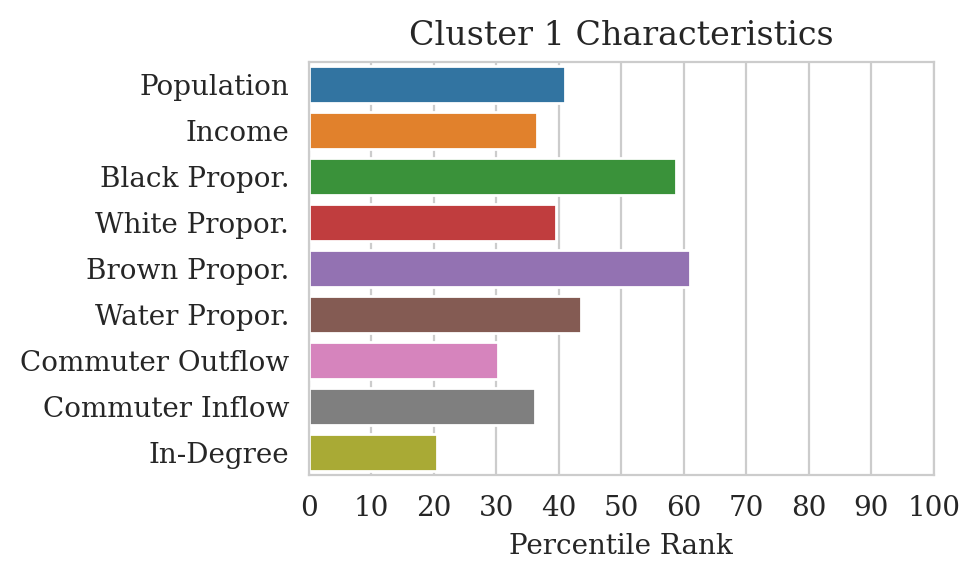

In [46]:
fig, ax = plt.subplots(figsize = (5 ,3))

sns.barplot(data = c0, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False)
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
plt.title('Cluster 1 Characteristics')
plt.ylabel('')
plt.xlabel('Percentile Rank')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
#plt.savefig(img_path + '/c1_demos.png', dpi=300)

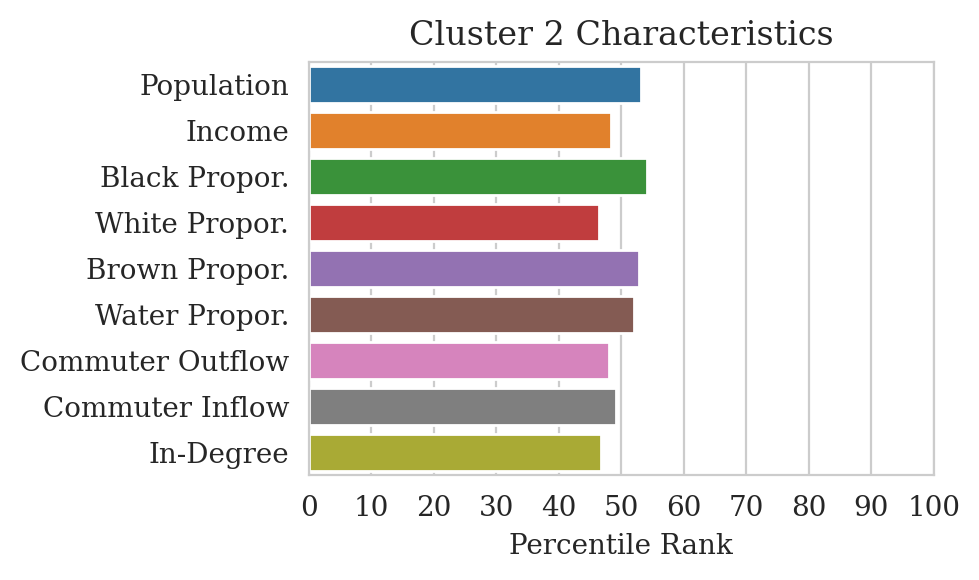

In [47]:
fig, ax = plt.subplots(figsize = (5 ,3))

sns.barplot(data = c1, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False)
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
plt.title('Cluster 2 Characteristics')
plt.ylabel('')
plt.xlabel('Percentile Rank')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
#plt.savefig(img_path + '/c2_demos.png', dpi=300)

In [49]:
c2

level_0           level_1      0
18        3        Population  54.36
19        3            Income  65.47
20        3     Black Propor.  42.17
21        3     White Propor.  63.22
22        3     Brown Propor.  35.53
23        3     Water Propor.  55.86
24        3  Commuter Outflow  66.28
25        3   Commuter Inflow  60.36
26        3         In-Degree  74.64

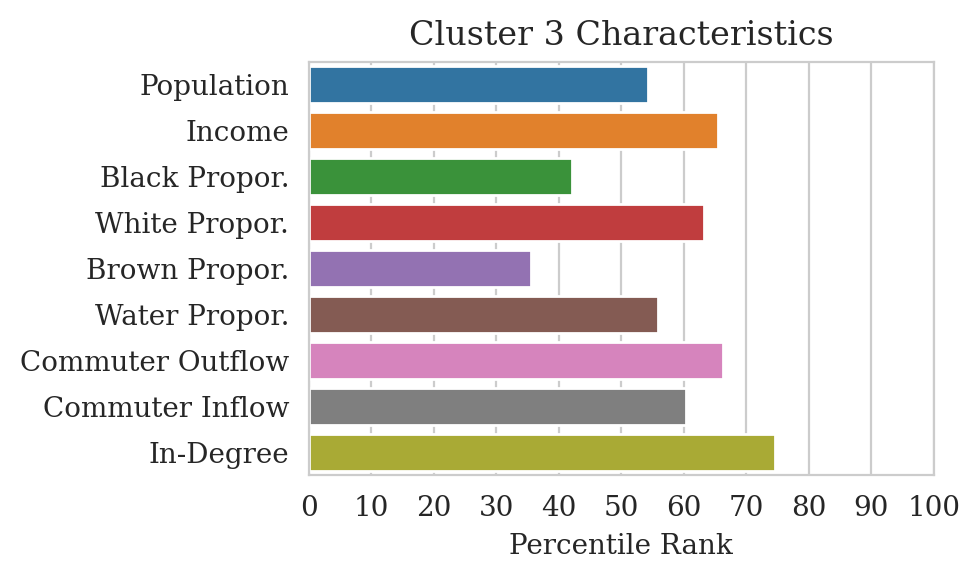

In [48]:
fig, ax = plt.subplots(figsize = (5 ,3))

sns.barplot(data = c2, y='level_1', x = 0, hue = 'level_1', orient='h', dodge=False)
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
plt.title('Cluster 3 Characteristics')
plt.ylabel('')
plt.xlabel('Percentile Rank')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
#plt.savefig(img_path + '/c3_demos.png', dpi=300)

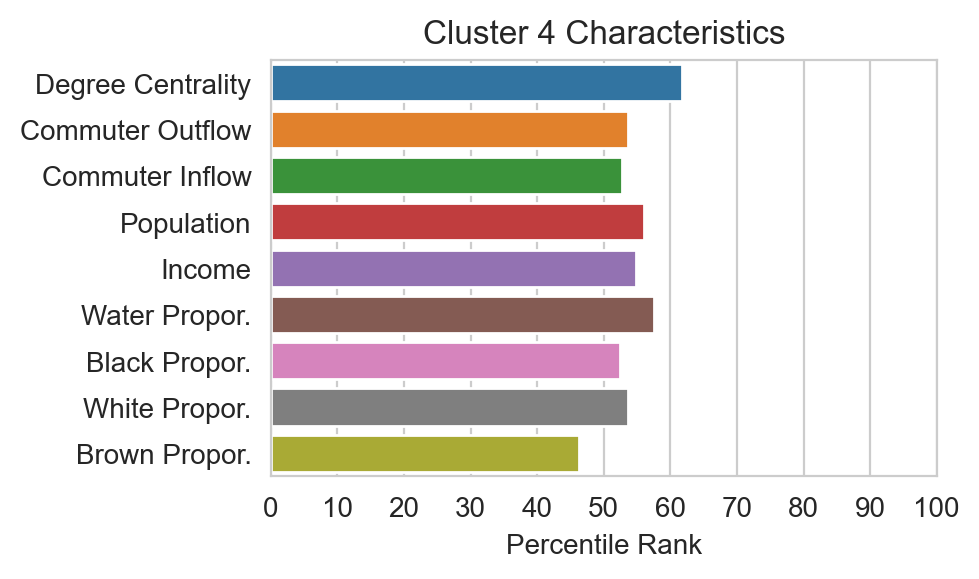

In [130]:
fig, ax = plt.subplots(figsize = (5 ,3))

sns.barplot(data = c3, y='level_1', x = 'pctl', hue = 'level_1', orient='h', dodge=False)
#plt.xticks(rotation = -45)
ax.legend().set_visible(False)
plt.title('Cluster 4 Characteristics')
plt.ylabel('')
plt.xlabel('Percentile Rank')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.tight_layout()
plt.savefig(img_path + '/c4_demos.png', dpi=300)

In [23]:
grouped_t = grouped.transpose()

In [26]:
grouped_t

0         1         2         3         4         5  \
hex_id                                                                        
88a8103a51fffff  8.915617  8.850136  8.741618  8.656734  8.510180  8.301525   
88a8102955fffff  8.740944  8.653623  8.492949  8.305085  8.044690  7.733312   
88a81045abfffff  8.183235  8.128134  8.057240  7.940940  7.788910  7.567632   
88a8100327fffff  8.194466  8.130351  8.044938  7.966424  7.825271  7.541534   
88a81000edfffff  7.804234  7.755135  7.657023  7.449722  7.259775  7.016584   
...                   ...       ...       ...       ...       ...       ...   
88a8106327fffff  8.924174  8.852489  8.753362  8.614681  8.353027  7.998393   
88a8107aabfffff  6.989793  6.948484  6.887626  6.759974  6.629887  6.425119   
88a810a893fffff  9.219935  9.162407  9.081322  8.964132  8.867384  8.649679   
88a8100b41fffff  6.967859  6.937234  6.882385  6.812827  6.685733  6.518659   
88a8102355fffff  8.779028  8.713574  8.599260  8.525641  8.414862  8.216149   

                        6         7         8         9  ...   61   62   63  \
hex_id                                                   ...                  
88a8103a51fffff  8.134729  7.903325  7.590266  7.089483  ...  0.0  0.0  0.0   
88a8102955fffff  7.336354  6.957822  6.569220  6.256583  ...  0.0  0.0  0.0   
88a81045abfffff  7.380038  7.117975  6.888398  6.477625  ...  0.0  0.0  0.0   
88a8100327fffff  7.300886  6.993345  6.630678  6.207059  ...  0.0  0.0  0.0   
88a81000edfffff  6.657091  6.310587  5.954341  5.674995  ...  0.0  0.0  0.0   
...                   ...       ...       ...       ...  ...  ...  ...  ...   
88a8106327fffff  7.721705  7.361883  6.947226  6.661299  ...  0.0  0.0  0.0   
88a8107aabfffff  6.178414  5.951767  5.609266  5.221291  ...  0.0  0.0  0.0   
88a810a893fffff  8.447963  8.181314  7.882914  7.584906  ...  0.0  0.0  0.0   
88a8100b41fffff  6.342100  6.168868  5.965235  5.687802  ...  0.0  0.0  0.0   
88a8102355fffff  8.039562  7.846363  7.560074  7.322217  ...  0.0  0.0  0.0   

                  64   65   66   67   68   69  cluster  
hex_id                                                  
88a8103a51fffff  0.0  0.0  0.0  0.0  0.0  0.0        2  
88a8102955fffff  0.0  0.0  0.0  0.0  0.0  0.0        1  
88a81045abfffff  0.0  0.0  0.0  0.0  0.0  0.0        2  
88a8100327fffff  0.0  0.0  0.0  0.0  0.0  0.0        2  
88a81000edfffff  0.0  0.0  0.0  0.0  0.0  0.0        2  
...              ...  ...  ...  ...  ...  ...      ...  
88a8106327fffff  0.0  0.0  0.0  0.0  0.0  0.0        2  
88a8107aabfffff  0.0  0.0  0.0  0.0  0.0  0.0        3  
88a810a893fffff  0.0  0.0  0.0  0.0  0.0  0.0        1  
88a8100b41fffff  0.0  0.0  0.0  0.0  0.0  0.0        3  
88a8102355fffff  0.0  0.0  0.0  0.0  0.0  0.0        2  

[2737 rows x 71 columns]

In [207]:
arr += 1

In [524]:
hex_ids['Unnamed: 0'].values

array(['88a8103a51fffff', '88a8102955fffff', '88a81045abfffff', ...,
       '88a8101739fffff', '88a810a89bfffff', '88a812b4d9fffff'],
      dtype=object)

In [541]:
grouped_t = grouped.transpose()

In [542]:
grouped_t['cluster'] = arr

In [543]:
data_path = '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data/'

In [544]:
import geopandas as gpd

In [545]:
iso = gpd.read_file(data_path + 'data-raw/cleaned/isolation.shp')
iso_plot = iso.drop_duplicates('h3')

### Plot of Isolation Hexagons

In [546]:
grouped_t.reset_index(inplace=True)

In [547]:
grouped_t

hex_id        0        1        2        3        4        5  \
0     88a8103a51fffff 8.915617 8.850136 8.741618 8.656734 8.510180 8.301525   
1     88a8102955fffff 8.740944 8.653623 8.492949 8.305085 8.044690 7.733312   
2     88a81045abfffff 8.183235 8.128134 8.057240 7.940940 7.788910 7.567632   
3     88a8100327fffff 8.194466 8.130351 8.044938 7.966424 7.825271 7.541534   
4     88a81000edfffff 7.804234 7.755135 7.657023 7.449722 7.259775 7.016584   
...               ...      ...      ...      ...      ...      ...      ...   
2732  88a8106327fffff 8.924174 8.852489 8.753362 8.614681 8.353027 7.998393   
2733  88a8107aabfffff 6.989793 6.948484 6.887626 6.759974 6.629887 6.425119   
2734  88a810a893fffff 9.219935 9.162407 9.081322 8.964132 8.867384 8.649679   
2735  88a8100b41fffff 6.967859 6.937234 6.882385 6.812827 6.685733 6.518659   
2736  88a8102355fffff 8.779028 8.713574 8.599260 8.525641 8.414862 8.216149   

            6        7        8  ...       61       62       63       64  \
0    8.134729 7.903325 7.590266  ... 0.000000 0.000000 0.000000 0.000000   
1    7.336354 6.957822 6.569220  ... 0.000000 0.000000 0.000000 0.000000   
2    7.380038 7.117975 6.888398  ... 0.000000 0.000000 0.000000 0.000000   
3    7.300886 6.993345 6.630678  ... 0.000000 0.000000 0.000000 0.000000   
4    6.657091 6.310587 5.954341  ... 0.000000 0.000000 0.000000 0.000000   
...       ...      ...      ...  ...      ...      ...      ...      ...   
2732 7.721705 7.361883 6.947226  ... 0.000000 0.000000 0.000000 0.000000   
2733 6.178414 5.951767 5.609266  ... 0.000000 0.000000 0.000000 0.000000   
2734 8.447963 8.181314 7.882914  ... 0.000000 0.000000 0.000000 0.000000   
2735 6.342100 6.168868 5.965235  ... 0.000000 0.000000 0.000000 0.000000   
2736 8.039562 7.846363 7.560074  ... 0.000000 0.000000 0.000000 0.000000   

           65       66       67       68       69  cluster  
0    0.000000 0.000000 0.000000 0.000000 0.000000        2  
1    0.000000 0.000000 0.000000 0.000000 0.000000        1  
2    0.000000 0.000000 0.000000 0.000000 0.000000        2  
3    0.000000 0.000000 0.000000 0.000000 0.000000        2  
4    0.000000 0.000000 0.000000 0.000000 0.000000        2  
...       ...      ...      ...      ...      ...      ...  
2732 0.000000 0.000000 0.000000 0.000000 0.000000        2  
2733 0.000000 0.000000 0.000000 0.000000 0.000000        3  
2734 0.000000 0.000000 0.000000 0.000000 0.000000        1  
2735 0.000000 0.000000 0.000000 0.000000 0.000000        3  
2736 0.000000 0.000000 0.000000 0.000000 0.000000        2  

[2737 rows x 72 columns]

In [548]:
to_plot = gpd.GeoDataFrame(grouped_t.merge(iso_plot, left_on='hex_id', right_on='h3')[['cluster', 'geometry']])

In [549]:
#to_plot.loc[to_plot['cluster']==2, 'cluster'] = 0
#to_plot.loc[to_plot['cluster']==1, 'cluster'] = 2
#to_plot.loc[to_plot['cluster']==0, 'cluster'] = 1




In [550]:
to_plot['cluster'].value_counts()

2    1179
3    1008
1     550
Name: cluster, dtype: int64

In [551]:
to_plot = to_plot.to_crs(epsg=3857)

In [552]:
import h3
import pandas as pd
import geopandas as gpd
import shapely
import pandas as pd
from shapely.geometry import MultiPolygon, Polygon, Point
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import geobr
import pyreadr
import matplotlib
%matplotlib inline

In [553]:
cmap = matplotlib.cm.get_cmap("viridis", 3)


In [554]:
to_plot['cluster'].unique()

array([2, 1, 3])

<AxesSubplot:>

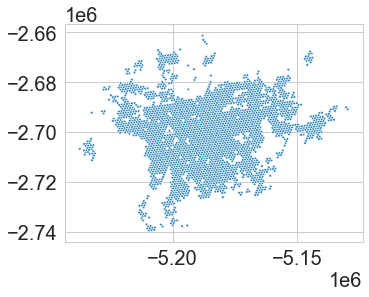

In [555]:
to_plot.plot()

In [556]:
to_plot['cluster'] = to_plot['cluster'].replace(1, 'Cluster A')
to_plot['cluster'] = to_plot['cluster'].replace(2, 'Cluster B')
to_plot['cluster'] = to_plot['cluster'].replace(3, 'Cluster C')

In [585]:
leg

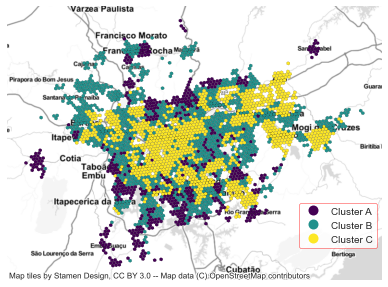

In [626]:
plt.rcParams['legend.frameon'] = 'True'

fig, ax = plt.subplots(figsize=(5.5, 5))
ax = to_plot.plot(alpha=1, edgecolor='k', ax=ax, linewidth=0.1, categorical =True, column='cluster', legend=True, cmap=cmap)

leg = ax.get_legend()
frame = leg.get_frame()
frame.set_edgecolor('red')
ax.set_axis_off()
leg.set_bbox_to_anchor((1.0, 0.3, 0,0))
#plt.title("Infection Delay Cluster Visualisation")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.tight_layout()
plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Writing/IMG/cluster_IDs.pdf', dpi=300)



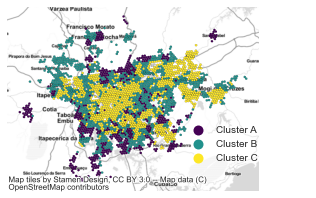

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Infection Delay Cluster Assignments')

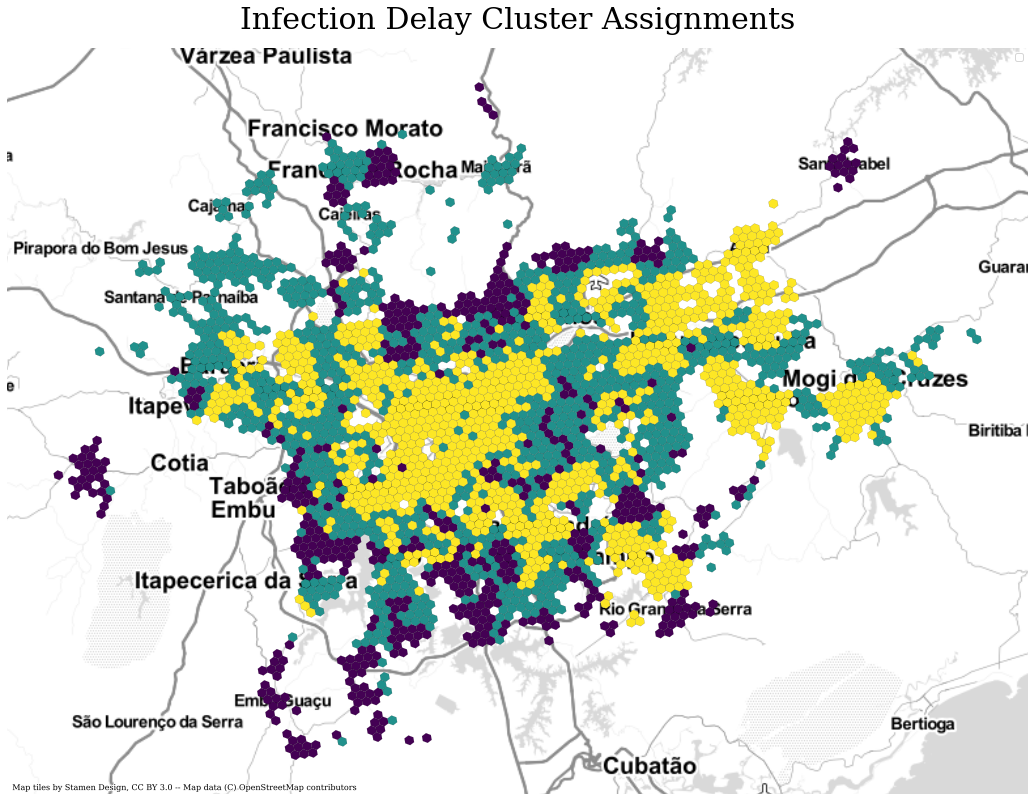

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Serif"

fig, ax = plt.subplots(figsize=(15, 15))
ax = to_plot.plot(alpha=1, edgecolor='k', ax=ax, linewidth=0.1, categorical =True, column='cluster', legend=True, cmap=cmap)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.tight_layout()
leg = ax.get_legend()
fig = ax.figure
#fig = ax.figure
#cb_ax = fig.axes[1]
#cb_ax.tick_params(labelsize=30, reset=False)
ax.set_axis_off()
plt.legend()
plt.title("Infection Delay Cluster Assignments", fontdict = {'fontsize': 30}, pad=20)


#plt.savefig('/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Writing/IMG/cluster_IDs.pdf', dpi=300)



In [14]:
c0_indx = np.where(arr == 0)[0]
c1_indx = np.where(arr == 1)[0]
c2_indx = np.where(arr == 2)[0]
c3_indx = np.where(arr == 3)[0]

In [15]:
c0_med = grouped.iloc[:, c0_indx].median(axis=1)
c1_med = grouped.iloc[:, c1_indx].median(axis=1)
c2_med = grouped.iloc[:, c2_indx].median(axis=1)
c3_med = grouped.iloc[:, c3_indx].median(axis=1)

In [17]:
c3_med

0     3.906261
1     3.891110
2     3.870277
3     3.825693
4     3.780967
        ...   
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
Length: 70, dtype: float64

In [18]:
print('Maximum Time for 4 Days Saved from Intervention')
print(c0_med[c0_med <= 4].reset_index().iloc[0, 0])
print(c1_med[c1_med <= 4].reset_index().iloc[0, 0])
print(c2_med[c2_med <= 4].reset_index().iloc[0, 0])
print(c3_med[c3_med <= 4].reset_index().iloc[0, 0])

print('Maximum Time for 3 Days Saved from Intervention')
print(c0_med[c0_med <= 3].reset_index().iloc[0, 0])
print(c1_med[c1_med <= 3].reset_index().iloc[0, 0])
print(c2_med[c2_med <= 3].reset_index().iloc[0, 0])
print(c3_med[c3_med <= 3].reset_index().iloc[0, 0])


print('Maximum Time for 2 Days Saved from Intervention')
print(c0_med[c0_med <= 2].reset_index().iloc[0, 0])
print(c1_med[c1_med <= 2].reset_index().iloc[0, 0])
print(c2_med[c2_med <= 2].reset_index().iloc[0, 0])
print(c3_med[c3_med <= 2].reset_index().iloc[0, 0])


print('Maximum Time for 1 Days Saved from Intervention')
print(c0_med[c0_med <= 1].reset_index().iloc[0, 0])
print(c1_med[c1_med <= 1].reset_index().iloc[0, 0])
print(c2_med[c2_med <= 1].reset_index().iloc[0, 0])
print(c3_med[c3_med <= 1].reset_index().iloc[0, 0])




Maximum Time for 4 Days Saved from Intervention
8
6
0
0
Maximum Time for 3 Days Saved from Intervention
16
14
8
11
Maximum Time for 2 Days Saved from Intervention
21
18
13
16
Maximum Time for 1 Days Saved from Intervention
37
36
33
35


In [743]:
!conda install altair
!y

^C

CondaError: KeyboardInterrupt

zsh:1: command not found: y


In [741]:
import altair

ModuleNotFoundError: No module named 'altair'

In [ ]:
import altair as alt
from vega_datasets import data

source = data.wheat()

alt.Chart(source).mark_bar().encode(
    x='wheat:Q',
    y="year:O"
).properties(height=700)